In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import plotly.express as px

In [2]:
df = pd.read_csv("TELEVISION.csv")
df.sample(10)

,Product_Name,Stars,Ratings,Reviews,current_price,MRP,channel,Operating_system,Picture_qualtiy,Speaker,Frequency,Image_url,Unnamed: 12
290,Croma,4.2,1773,217,₹7990,₹20000,HD Ready 1366 x 768 Pixels,20 Speaker Output,60 Hz Refresh Rate,2 x HDMI | 2 x USB,1 Year Warranty,https://rukminim1.flixcart.com/image/312/312/k...,NaN
262,TOSHIBA,4.2,1110,177,₹28490,₹39990,Netflix|Prime Video|Youtube,Operating System: VIDAA,Ultra HD (4K) 3840 x 2160 Pixels,24 W Speaker Output,60 Hz Refresh Rate,https://rukminim1.flixcart.com/image/312/312/k...,NaN
202,acer,4.4,1722,265,₹13999,₹19990,Netflix|Prime Video|Disney+Hotstar|Youtube,Operating System: Android,HD Ready 1366 x 768 Pixels,24 W Speaker Output,60 Hz Refresh Rate,https://rukminim1.flixcart.com/image/312/312/k...,NaN
325,SAMSUNG,0.0,0,0,₹74990,₹129900,Netflix|Prime Video|Disney+Hotstar|Youtube,Operating System: Tizen,Ultra HD (4K) 3840 x 2160 Pixels,40 W Speaker Output,60 Hz Refresh Rate,https://rukminim1.flixcart.com/image/312/312/k...,NaN
141,TCL,4.3,0,0,₹15990,₹29990,Netflix|Disney+Hotstar|Youtube,Operating System: Android,HD Ready 1366 x 768 Pixels,20 W Speaker Output,60 Hz Refresh Rate,https://rukminim1.flixcart.com/image/312/312/l...,NaN
270,SAMSUNG,4.5,0,0,₹84990,₹119900,Netflix|Disney+Hotstar|Youtube,Operating System: Tizen,Ultra HD (4K) 3840 x 2160 Pixels,40 W Speaker Output,60 Hz Refresh Rate,https://rukminim1.flixcart.com/image/312/312/k...,NaN
467,Hisense,4.3,0,0,₹40990,₹59990,Netflix|Prime Video|Disney+Hotstar|Youtube,Operating System: Android,Ultra HD (4K) 3840 x 2160 Pixels,102 W Speaker Output,60 Hz Refresh Rate,https://rukminim1.flixcart.com/image/312/312/l...,NaN
800,Lloyd,0.0,0,0,₹99990,0,Netflix|Prime Video|Disney+Hotstar|Youtube,Operating System: Android,Ultra HD (4K) 3840 x 2160 Pixels,20 W Speaker Output,60 Hz Refresh Rate,https://rukminim1.flixcart.com/image/312/312/l...,NaN
726,Adsun,3.8,6742,930,₹8699,₹21999,Netflix|Disney+Hotstar|Youtube,Operating System: Android Based,HD Ready 1366 x 768 Pixels,20 W Speaker Output,60 Hz Refresh Rate,https://rukminim1.flixcart.com/image/312/312/k...,NaN
811,Haier,4.0,0,0,₹36990,0,Full HD 1920 x 1080 Pixels,16 W Speaker Output,60 Hz Refresh Rate,2 x HDMI | 2 x USB,1 Year Company Warranty,https://rukminim1.flixcart.com/image/312/312/t...,NaN


In [3]:
df.describe()

,Stars,Ratings,Reviews
count,884.000000,884.000000,884.000000
mean,3.299887,3874.832579,772.714932
std,1.738470,8412.288731,2972.465671
min,0.000000,0.000000,0.000000
25%,3.800000,0.000000,0.000000
50%,4.200000,0.000000,0.000000
75%,4.300000,6702.750000,910.000000
max,5.000000,67598.000000,67204.000000


In [4]:
df.isna().sum()

Product_Name          0
Stars                 0
Ratings               0
Reviews               0
current_price         0
MRP                   0
channel               0
Operating_system      0
Picture_qualtiy       0
Speaker               0
Frequency             0
Image_url             0
Unnamed: 12         882
dtype: int64

#### Cột Unnamed: 12 có 882 dữ liệu null

In [5]:
df.duplicated().sum()

207

#### Có 207 dữ liệu duplicated

## Xử lý các vấn đề về cấu trúc

In [6]:
df.columns

Index(['Product_Name', 'Stars', 'Ratings', 'Reviews', 'current_price', 'MRP',
       'channel', 'Operating_system', 'Picture_qualtiy', 'Speaker',
       'Frequency', 'Image_url', 'Unnamed: 12'],
      dtype='object')

## Xử lý dữ liệu

#### Xóa các cột không cần thiết

In [7]:
df = df.drop(['channel', 'Image_url','Unnamed: 12'],axis=1)

In [8]:
#Kiểm tra DL trong cột 'Operating_system'
df['Operating_system'].unique()

array(['20 Speaker Output', 'Operating System: Android Based',
       'Operating System: WebOS', 'Operating System: Android',
       'Operating System: Tizen', '20 W Speaker Output',
       'Operating System: Linux', 'Operating System: Coolita',
       '16 Speaker Output', 'Operating System: Google TV',
       'Operating System: VIDAA', 'Operating System: Linux based',
       '16 W Speaker Output', '20 WATT Speaker Output',
       'Ultra HD (4K) 3840x2160 Pixels', '35W Speaker Output',
       '60W Speaker Output', 'NO Speaker Output', '20W Speaker Output',
       'HD Ready 1366 x 768 Pixels', 'Operating System: FireTv OS 6',
       'HD Ready 1', '8 W x 2 Speaker Output',
       'Ultra HD (4K) 3840 x 2160 Pixels', '40 W Speaker Output',
       '60 W Speaker Output', 'Full HD 1920 x 1080 Pixels',
       '8W x 2 Speaker Output', '60 Watts Speaker Output',
       '20 w Speaker Output', '14 W Speaker Output',
       '24 W Speaker Output', 'Ultra HD (4K) 3840 * 2160 Pixels',
       '10 W Spe

#### Cột 'Operating_system' chứa rất nhiều giá trị khác hau. Gom các Operating System: ... thành 1 loại Operating System: 

In [9]:
df['Operating_system'] = df['Operating_system'].str.split(':').str[-1].str.strip()

In [10]:
df['Operating_system'].unique()

array(['20 Speaker Output', 'Android Based', 'WebOS', 'Android', 'Tizen',
       '20 W Speaker Output', 'Linux', 'Coolita', '16 Speaker Output',
       'Google TV', 'VIDAA', 'Linux based', '16 W Speaker Output',
       '20 WATT Speaker Output', 'Ultra HD (4K) 3840x2160 Pixels',
       '35W Speaker Output', '60W Speaker Output', 'NO Speaker Output',
       '20W Speaker Output', 'HD Ready 1366 x 768 Pixels', 'FireTv OS 6',
       'HD Ready 1', '8 W x 2 Speaker Output',
       'Ultra HD (4K) 3840 x 2160 Pixels', '40 W Speaker Output',
       '60 W Speaker Output', 'Full HD 1920 x 1080 Pixels',
       '8W x 2 Speaker Output', '60 Watts Speaker Output',
       '20 w Speaker Output', '14 W Speaker Output',
       '24 W Speaker Output', 'Ultra HD (4K) 3840 * 2160 Pixels',
       '10 W Speaker Output', '2 X 18 W Speaker Output',
       '10 W Speaker Output for optimal sound', '10*2 Speaker Output',
       '60 Speaker Output', '8W X2 Audio Speaker Output',
       '10W x 2 Speaker Output', 'Fire

In [11]:
df.tail(10)

,Product_Name,Stars,Ratings,Reviews,current_price,MRP,Operating_system,Picture_qualtiy,Speaker,Frequency
874,Croma,4.2,0,0,₹11990,₹25000,Android,HD Ready 1366 x 768 Pixels,20 Speaker Output,60 Hz Refresh Rate
875,Micromax,4.2,2540,484,₹18990,₹36663,10 W x 2 Speaker Output,60 Hz Refresh Rate,2 x HDMI | 2 x USB,1 Year Warranty
876,Sansui,4.3,2207,321,₹6999,₹9999,16 W Speaker Output,60 Hz Refresh Rate,2 x HDMI | 2 x USB,A+ Grade Panel
877,SONY,4.6,0,0,₹59999,₹94900,NO Speaker Output,60 Hz Refresh Rate,2 x HDMI | 1 x USB,1 YEAR
878,Adsun,3.8,6742,930,₹8999,₹29999,Android Based,HD Ready 1366 x 768 Pixels,20 W Speaker Output,60 Hz Refresh Rate
879,SONY,4.5,6056,1082,₹34184,₹68400,Linux based,Ultra HD (4K) 3840 x 2160 Pixels,20 W Speaker Output,50 Hz Refresh Rate
880,Croma,0.0,0,0,₹9194,₹20000,20 Speaker Output,60 Hz Refresh Rate,2 x HDMI | 2 x USB,3 Years Warranty
881,T-Series,0.0,0,0,₹26999,₹33990,Full HD 1920 x 1080 Pixels,16 Speaker Output,50 Hz Refresh Rate,2 x HDMI | 2 x USB
882,Adsun,3.8,6742,930,₹6199,₹12999,20 W Speaker Output,60 Hz Refresh Rate,1 x HDMI | 2 x USB,A+ Grade
883,SONY,4.4,0,0,₹52949,₹72990,10W + 10W Speaker Output,50 Hz Refresh Rate,2 x HDMI | 2 x USB,1 YEAR


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Name      884 non-null    object 
 1   Stars             884 non-null    float64
 2   Ratings           884 non-null    int64  
 3   Reviews           884 non-null    int64  
 4   current_price     884 non-null    object 
 5   MRP               884 non-null    object 
 6   Operating_system  884 non-null    object 
 7   Picture_qualtiy   884 non-null    object 
 8   Speaker           884 non-null    object 
 9   Frequency         884 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 69.2+ KB


#### Ép kiểu dữ liệu

In [13]:
# Xóa ký tự tiền tệ từ cột 'current_price' và 'MRP'
df['current_price'] = df['current_price'].str.replace('₹', '')
df['MRP'] = df['MRP'].str.replace('₹', '')

# Chuyển đổi kiểu dữ liệu của các cột sang kiểu float
df['current_price'] = df['current_price'].astype(float)
df['MRP'] = df['MRP'].astype(float)
df['Ratings'] = df['Ratings'].astype(float)
df['Reviews'] = df['Reviews'].astype(float)

#### Dữ liệu duplicated

In [14]:
df.duplicated().sum()

216

In [15]:
#Xoá các dòng bị trùng lặp
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
877    False
879    False
880    False
881    False
883    False
Length: 668, dtype: bool

#### Dữ liệu null

In [17]:
df.isna().sum()

Product_Name        0
Stars               0
Ratings             0
Reviews             0
current_price       0
MRP                 0
Operating_system    0
Picture_qualtiy     0
Speaker             0
Frequency           0
dtype: int64

In [18]:
# count 0 in Reviews column
df[df['Stars'] == 0].count()
df[df['Ratings'] == 0].count()
df[df['Reviews'] == 0].count()

Product_Name        445
Stars               445
Ratings             445
Reviews             445
current_price       445
MRP                 445
Operating_system    445
Picture_qualtiy     445
Speaker             445
Frequency           445
dtype: int64

In [19]:
# # Tính giá trị trung bình của cột 'Ratings' và 'Reviews'
# avg_ratings = df['Ratings'].mean()
# avg_reviews = df['Reviews'].mean()

# # Thay thế các giá trị 0 bằng giá trị trung bình của từng cột
# df['Ratings'] = df['Ratings'].replace(0, avg_ratings)
# df['Reviews'] = df['Reviews'].replace(0, avg_reviews)

# Xóa các dòng có giá trị 0 trong cột 'Stars', 'Ratings' và 'Reviews'
df = df[df['Stars'] != 0]
df = df[df['Ratings'] != 0]
df = df[df['Reviews'] != 0]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 0 to 879
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Name      223 non-null    object 
 1   Stars             223 non-null    float64
 2   Ratings           223 non-null    float64
 3   Reviews           223 non-null    float64
 4   current_price     223 non-null    float64
 5   MRP               223 non-null    float64
 6   Operating_system  223 non-null    object 
 7   Picture_qualtiy   223 non-null    object 
 8   Speaker           223 non-null    object 
 9   Frequency         223 non-null    object 
dtypes: float64(5), object(5)
memory usage: 19.2+ KB


In [21]:
df.isna().sum()

Product_Name        0
Stars               0
Ratings             0
Reviews             0
current_price       0
MRP                 0
Operating_system    0
Picture_qualtiy     0
Speaker             0
Frequency           0
dtype: int64

In [22]:
df.describe()

,Stars,Ratings,Reviews,current_price,MRP
count,223.000000,223.000000,223.000000,223.000000,223.000000
mean,4.291928,11897.233184,2577.735426,30605.098655,42761.125561
std,0.187269,13233.325507,5503.982614,18300.188164,28562.432083
min,3.800000,591.000000,102.000000,5490.000000,0.000000
25%,4.200000,3010.000000,533.000000,16994.500000,21999.000000
50%,4.300000,6742.000000,930.000000,27990.000000,36990.000000
75%,4.400000,17459.000000,2999.500000,38494.500000,54999.000000
max,4.700000,67598.000000,67204.000000,99999.000000,149999.000000


In [23]:
# Xác định ngưỡng cho giá trị ngoại lệ cho từng cột số
Q1 = df[['current_price', 'MRP']].quantile(0.25)
Q3 = df[['current_price', 'MRP']].quantile(0.75)
IQR = Q3 - Q1

# Loại bỏ các dòng chứa giá trị ngoại lệ từ DataFrame
df = df[~((df[['current_price', 'MRP']] < (Q1 - 1.5 * IQR)) | (df[['current_price', 'MRP']] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [24]:
# Xác định ngưỡng cho giá trị ngoại lệ cho từng cột số
Q1 = df[['Ratings', 'Reviews']].quantile(0.25)
Q3 = df[['Ratings', 'Reviews']].quantile(0.75)
IQR = Q3 - Q1
IQR = IQR * 0.5
# Loại bỏ các dòng chứa giá trị ngoại lệ từ DataFrame
df = df[~((df[['Ratings', 'Reviews']] < (Q1 - IQR)) | (df[['Ratings', 'Reviews']] > (Q3 + IQR))).any(axis=1)]

In [25]:
df.tail(10)

,Product_Name,Stars,Ratings,Reviews,current_price,MRP,Operating_system,Picture_qualtiy,Speaker,Frequency
857,RGL,4.0,2068.0,328.0,13490.0,19500.0,Android Based,Full HD 1920 x 1080 Pixels,20 W Speaker Output,50 Hz Refresh Rate
860,Hisense,4.4,2756.0,489.0,36990.0,43990.0,Android,Ultra HD (4K) 3840 x 2160 Pixels,30 W Speaker Output,60 Hz Refresh Rate
862,Adsun,3.8,6575.0,904.0,6199.0,12999.0,20 W Speaker Output,60 Hz Refresh Rate,1 x HDMI | 2 x USB,A+ Grade
863,RGL,4.0,2068.0,328.0,9490.0,12990.0,Full HD 1920 x 1080 Pixels,16 W Speaker Output,50 Hz Refresh Rate,2 x HDMI | 2 x USB
867,RGL,4.0,2068.0,328.0,5490.0,9990.0,Full HD 1920 x 1080 Pixels,16 W Speaker Output,50 Hz Refresh Rate,1 x HDMI | 1 x USB
869,SONY,4.4,1558.0,228.0,22999.0,27990.0,Linux based,HD Ready 1366 x 768 Pixels,30 W Speaker Output,50 Hz Refresh Rate
872,SONY,4.4,2044.0,441.0,27449.0,31900.0,Linux based,HD Ready 1366 x 768 Pixels,8 W x 2 Speaker Output,200 Hz Refresh Rate
875,Micromax,4.2,2540.0,484.0,18990.0,36663.0,10 W x 2 Speaker Output,60 Hz Refresh Rate,2 x HDMI | 2 x USB,1 Year Warranty
876,Sansui,4.3,2207.0,321.0,6999.0,9999.0,16 W Speaker Output,60 Hz Refresh Rate,2 x HDMI | 2 x USB,A+ Grade Panel
879,SONY,4.5,6056.0,1082.0,34184.0,68400.0,Linux based,Ultra HD (4K) 3840 x 2160 Pixels,20 W Speaker Output,50 Hz Refresh Rate


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, 0 to 879
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Name      166 non-null    object 
 1   Stars             166 non-null    float64
 2   Ratings           166 non-null    float64
 3   Reviews           166 non-null    float64
 4   current_price     166 non-null    float64
 5   MRP               166 non-null    float64
 6   Operating_system  166 non-null    object 
 7   Picture_qualtiy   166 non-null    object 
 8   Speaker           166 non-null    object 
 9   Frequency         166 non-null    object 
dtypes: float64(5), object(5)
memory usage: 14.3+ KB


In [27]:
df.columns

Index(['Product_Name', 'Stars', 'Ratings', 'Reviews', 'current_price', 'MRP',
       'Operating_system', 'Picture_qualtiy', 'Speaker', 'Frequency'],
      dtype='object')

## 1 biến phân loại (1 Categorical)

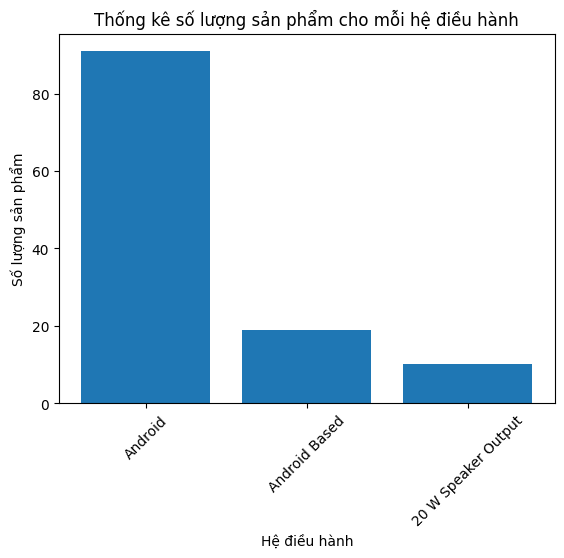

In [28]:
# Thống kê số lượng sản phẩm cho 3 hệ điều hành phổ biến nhất
os_counts = df['Operating_system'].value_counts()
top_os_counts = os_counts.head(3)

# Vẽ biểu đồ cột
plt.bar(top_os_counts.index, top_os_counts.values)
plt.xlabel('Hệ điều hành')
plt.ylabel('Số lượng sản phẩm')
plt.title('Thống kê số lượng sản phẩm cho mỗi hệ điều hành')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn
plt.show()

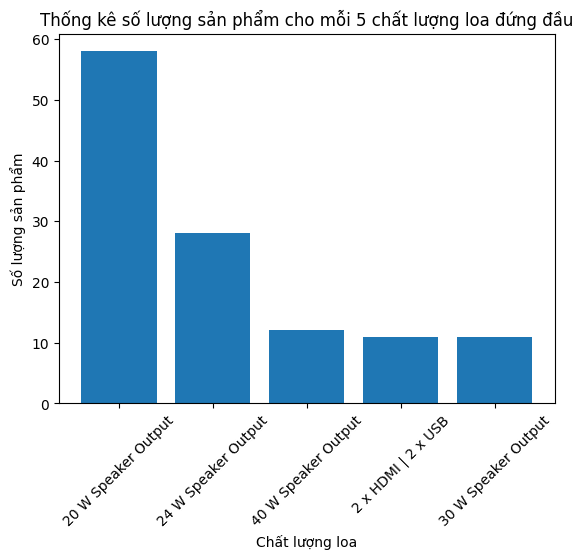

In [29]:
# Thống kê số lượng sản phẩm cho mỗi 5 chất lượng loa đứng đầu
speaker_counts = df['Speaker'].value_counts()
top_speaker_counts = speaker_counts.head(5)

# Vẽ biểu đồ cột
plt.bar(top_speaker_counts.index, top_speaker_counts.values)
plt.xlabel('Chất lượng loa')
plt.ylabel('Số lượng sản phẩm')
plt.title('Thống kê số lượng sản phẩm cho mỗi 5 chất lượng loa đứng đầu')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn
plt.show()

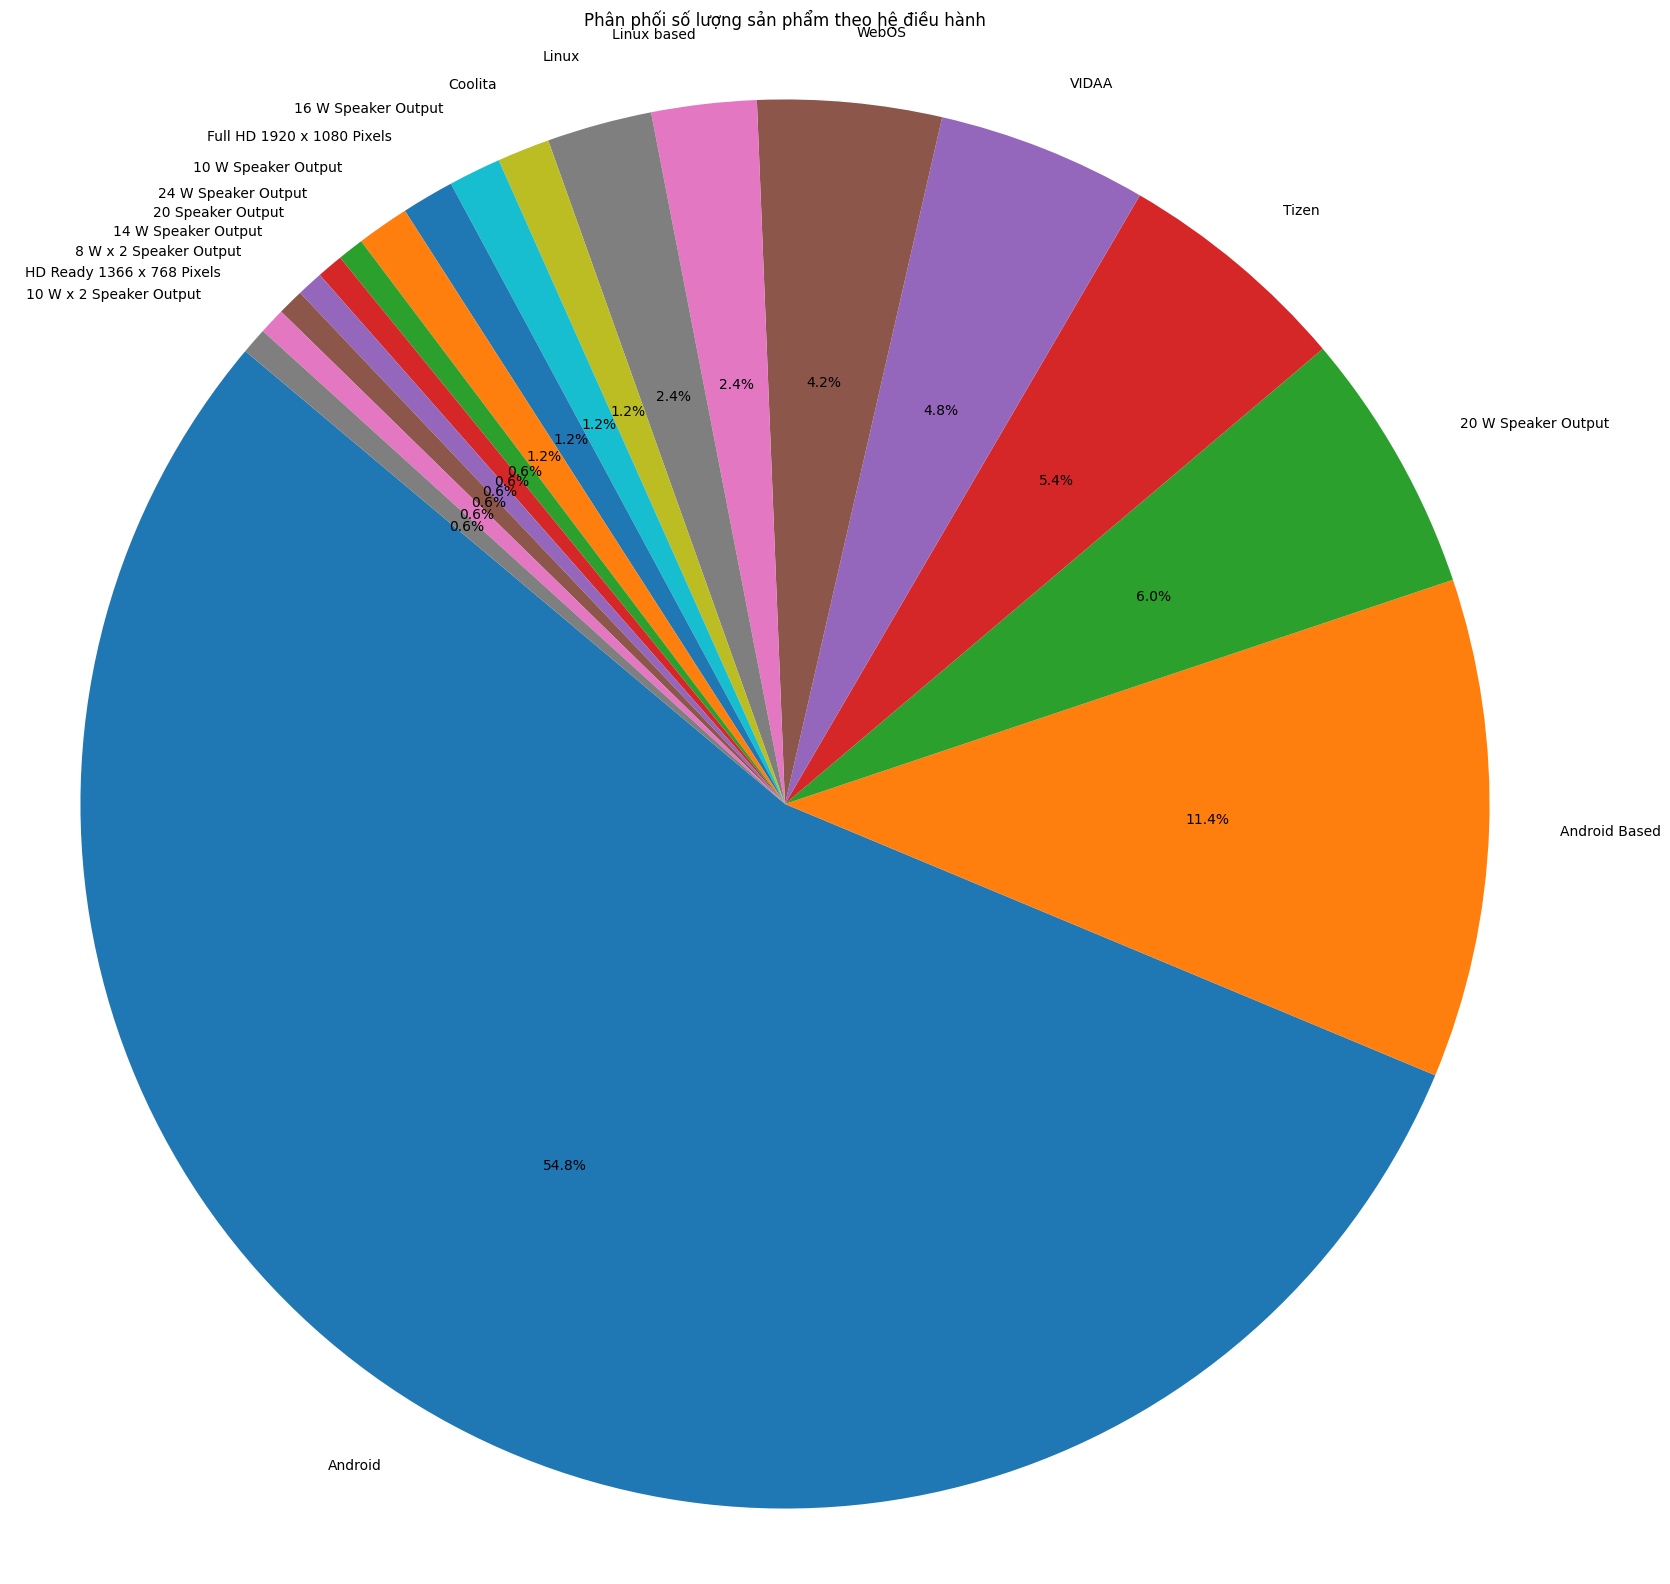

In [30]:
# Tính số lượng sản phẩm của từng hệ điều hành
os_counts = df['Operating_system'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(20, 20))
plt.pie(os_counts, labels=os_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Phân phối số lượng sản phẩm theo hệ điều hành')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

In [31]:
# Tính số lượng sản phẩm của từng hãng
os_counts = df['Product_Name'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(20, 20))
plt.pie(os_counts, labels=os_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Phân phối số lượng sản phẩm theo hãng')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

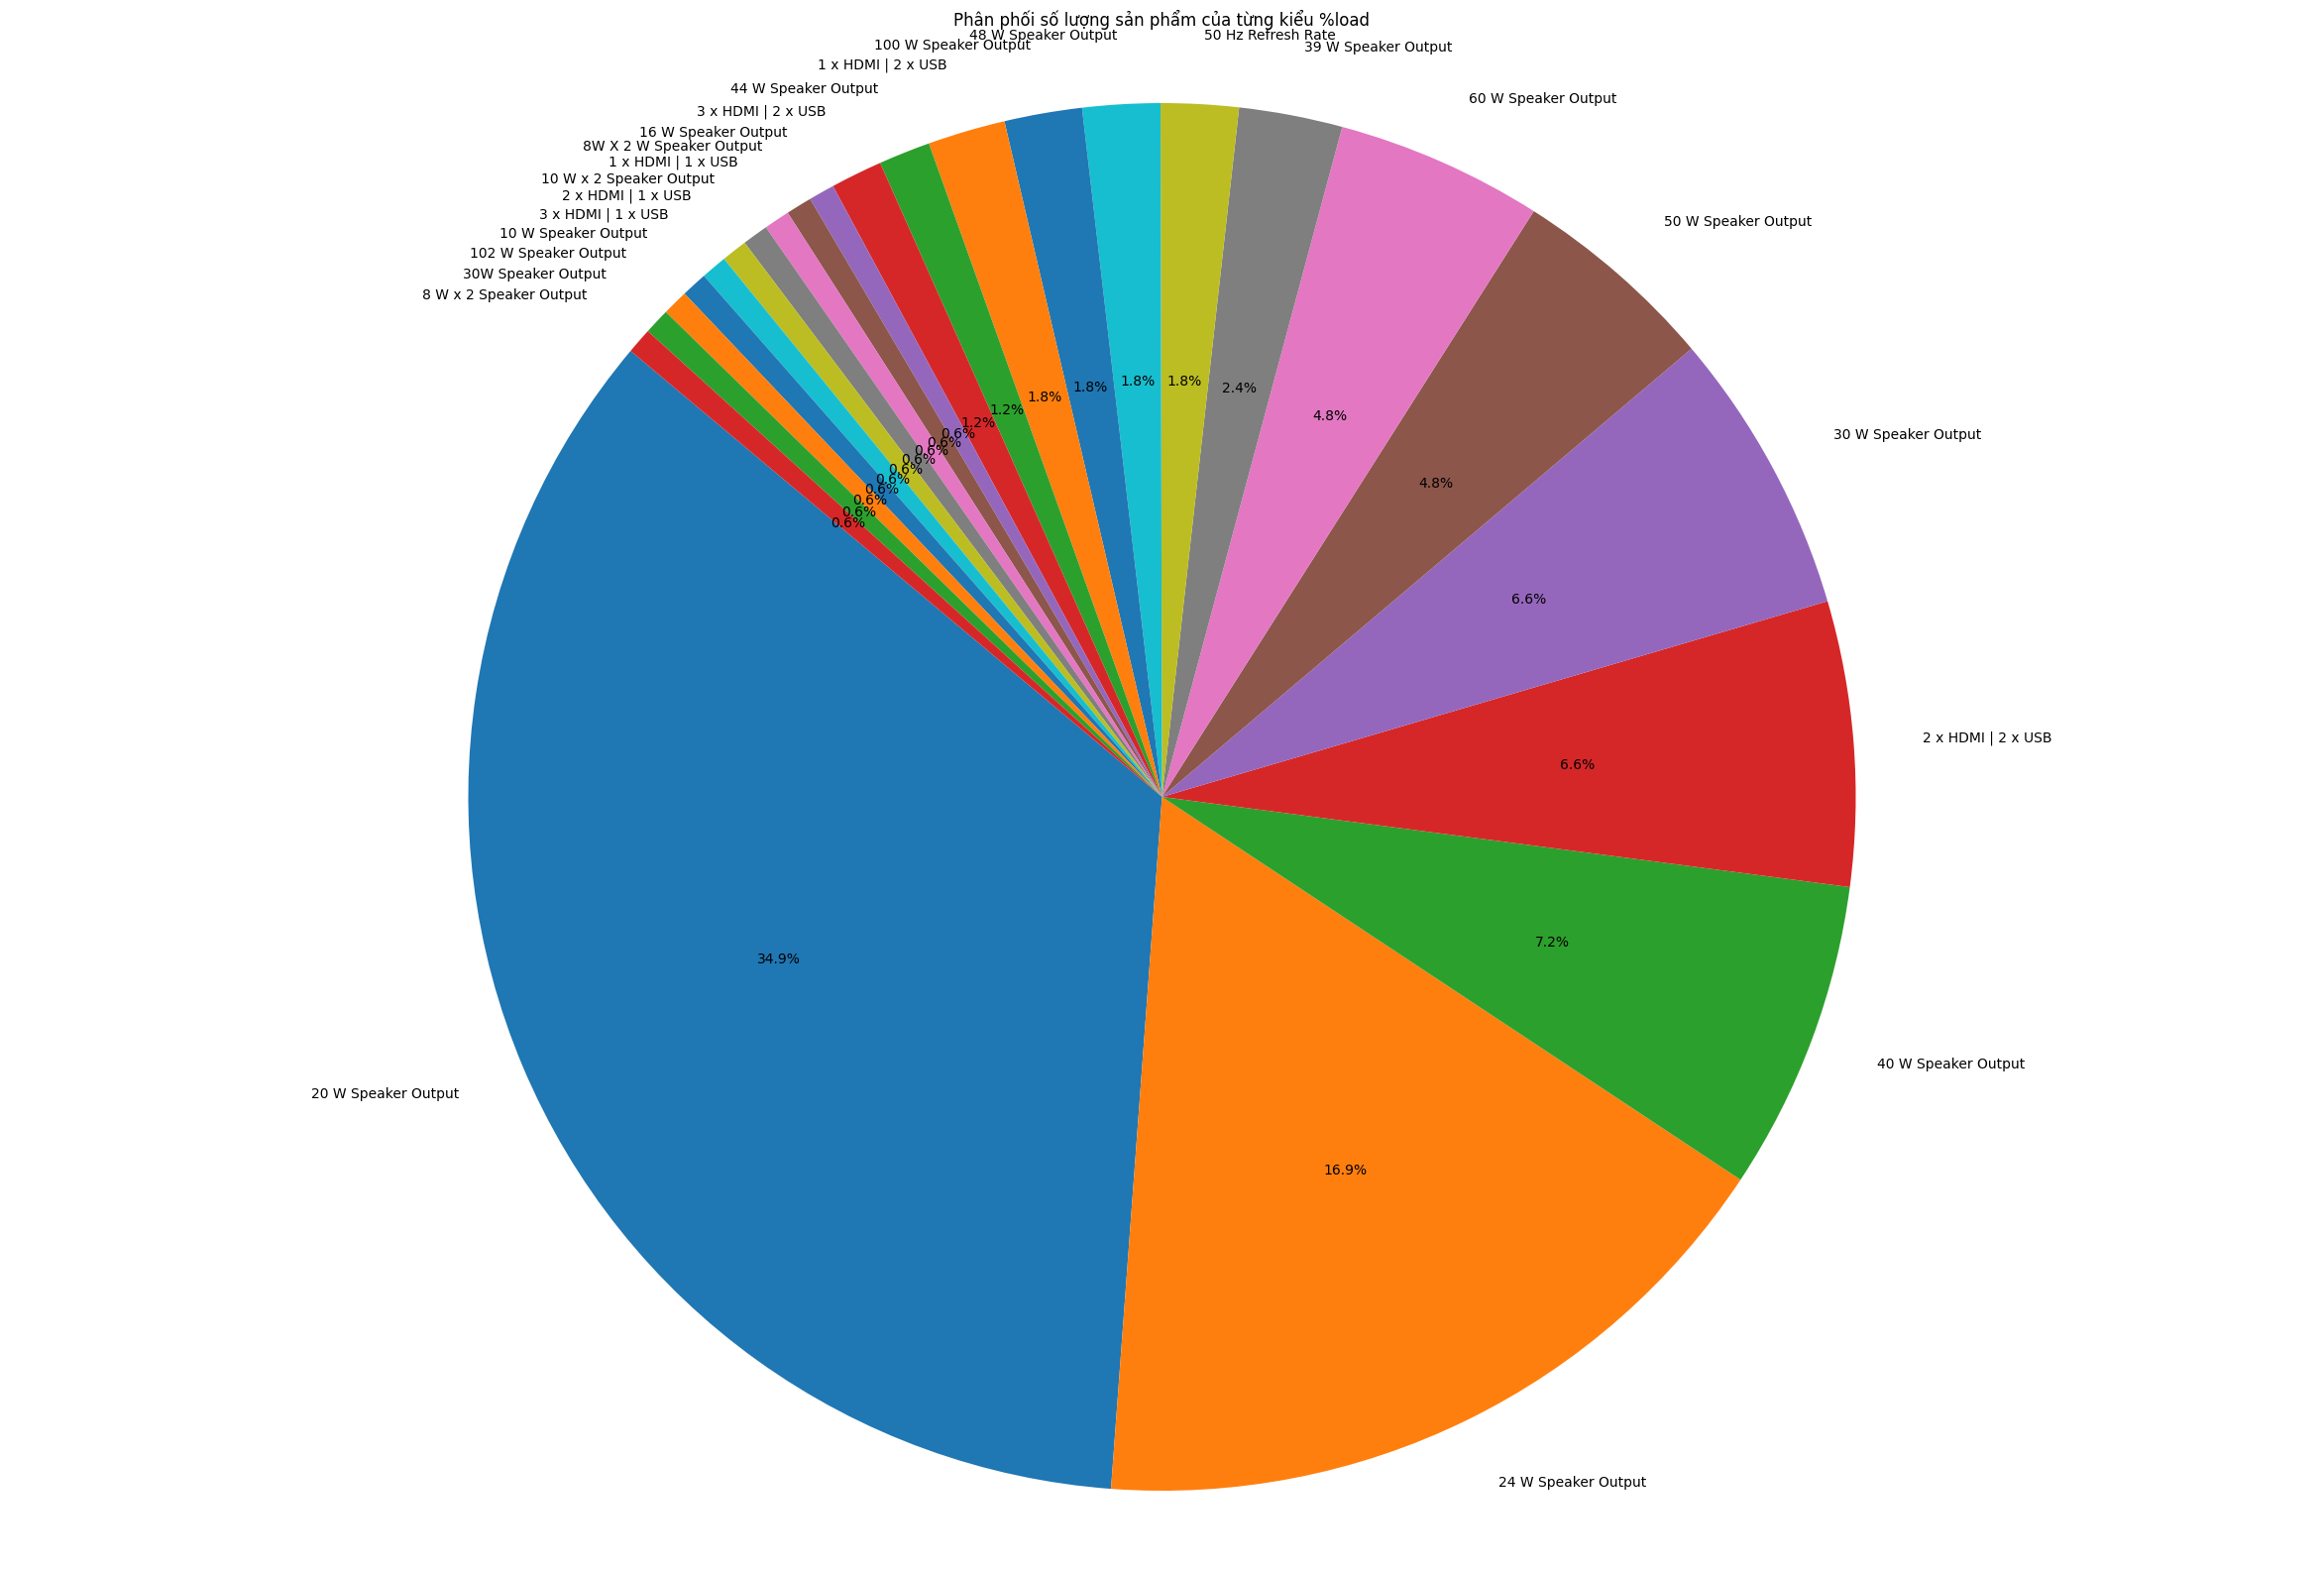

In [32]:
# Tính số lượng sản phẩm của từng kiểu loa
os_counts = df['Speaker'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(30, 20))
plt.pie(os_counts, labels=os_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Phân phối số lượng sản phẩm của từng kiểu %load')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

## 1 biến định lượng (1 Quantitative)

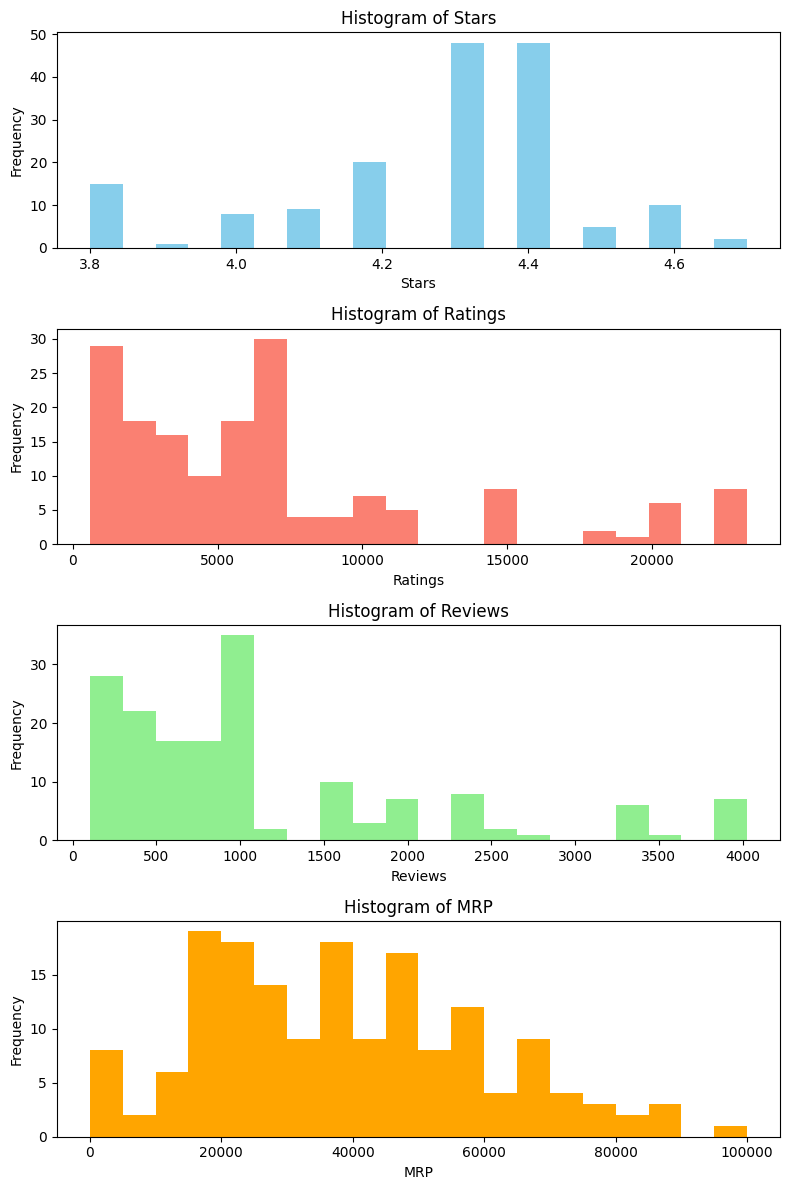

In [33]:
# Tạo một hình ảnh với nhiều subplot
fig, axs = plt.subplots(4, 1, figsize=(8, 12))

# Vẽ histogram cho biến Stars
axs[0].hist(df['Stars'], bins=20, color='skyblue')
axs[0].set_title('Histogram of Stars')
axs[0].set_xlabel('Stars')
axs[0].set_ylabel('Frequency')

# Vẽ histogram cho biến Ratings
axs[1].hist(df['Ratings'], bins=20, color='salmon')
axs[1].set_title('Histogram of Ratings')
axs[1].set_xlabel('Ratings')
axs[1].set_ylabel('Frequency')

# Vẽ histogram cho biến Reviews
axs[2].hist(df['Reviews'], bins=20, color='lightgreen')
axs[2].set_title('Histogram of Reviews')
axs[2].set_xlabel('Reviews')
axs[2].set_ylabel('Frequency')

# Vẽ histogram cho biến MRP
axs[3].hist(df['MRP'], bins=20, color='orange')
axs[3].set_title('Histogram of MRP')
axs[3].set_xlabel('MRP')
axs[3].set_ylabel('Frequency')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


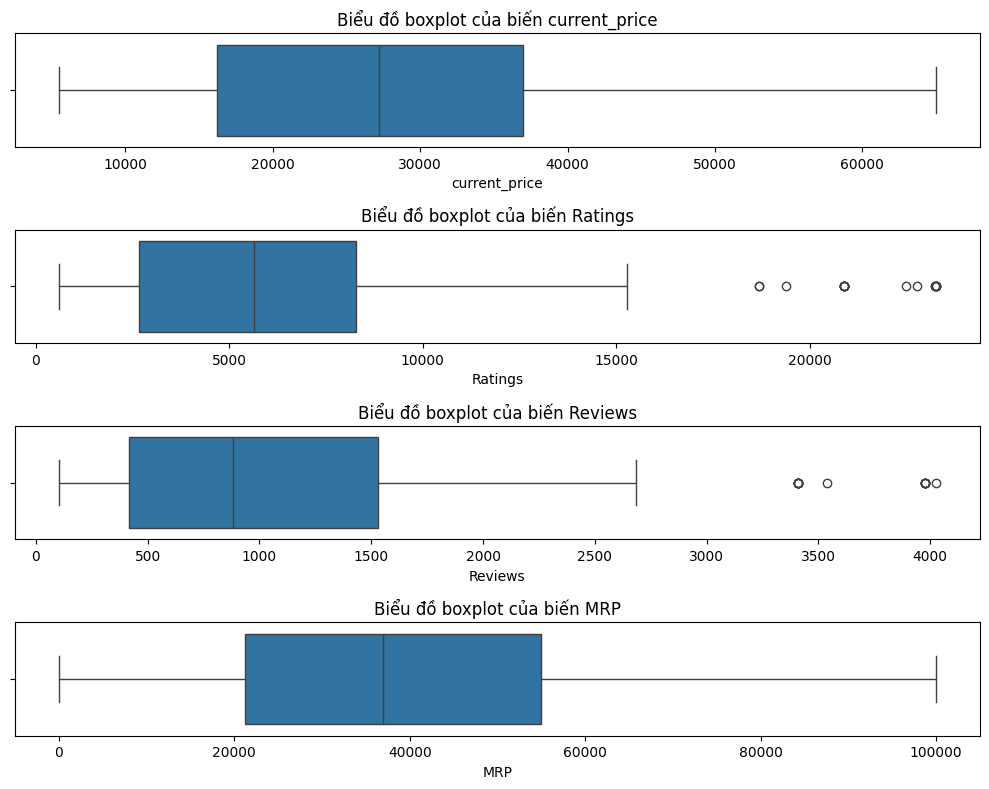

In [34]:
# Chọn 4 biến định lượng từ tập dữ liệu
selected_variables = ['current_price', 'Ratings', 'Reviews', 'MRP']

# Tạo một figure với kích thước 10x8
plt.figure(figsize=(10, 8))

# Vẽ boxplot cho từng biến định lượng
for i, variable in enumerate(selected_variables, 1):
    plt.subplot(4, 1, i)
    sns.boxplot(x=df[variable])
    plt.xlabel(variable)
    plt.title(f'Biểu đồ boxplot của biến {variable}')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [35]:
#xoa outline

## 1 biến định lượng và 1 biến phân loại (Quantitative-Categorical)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20748\45324040.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Operating_system', y='Stars', data=df_cleaned, palette='muted')


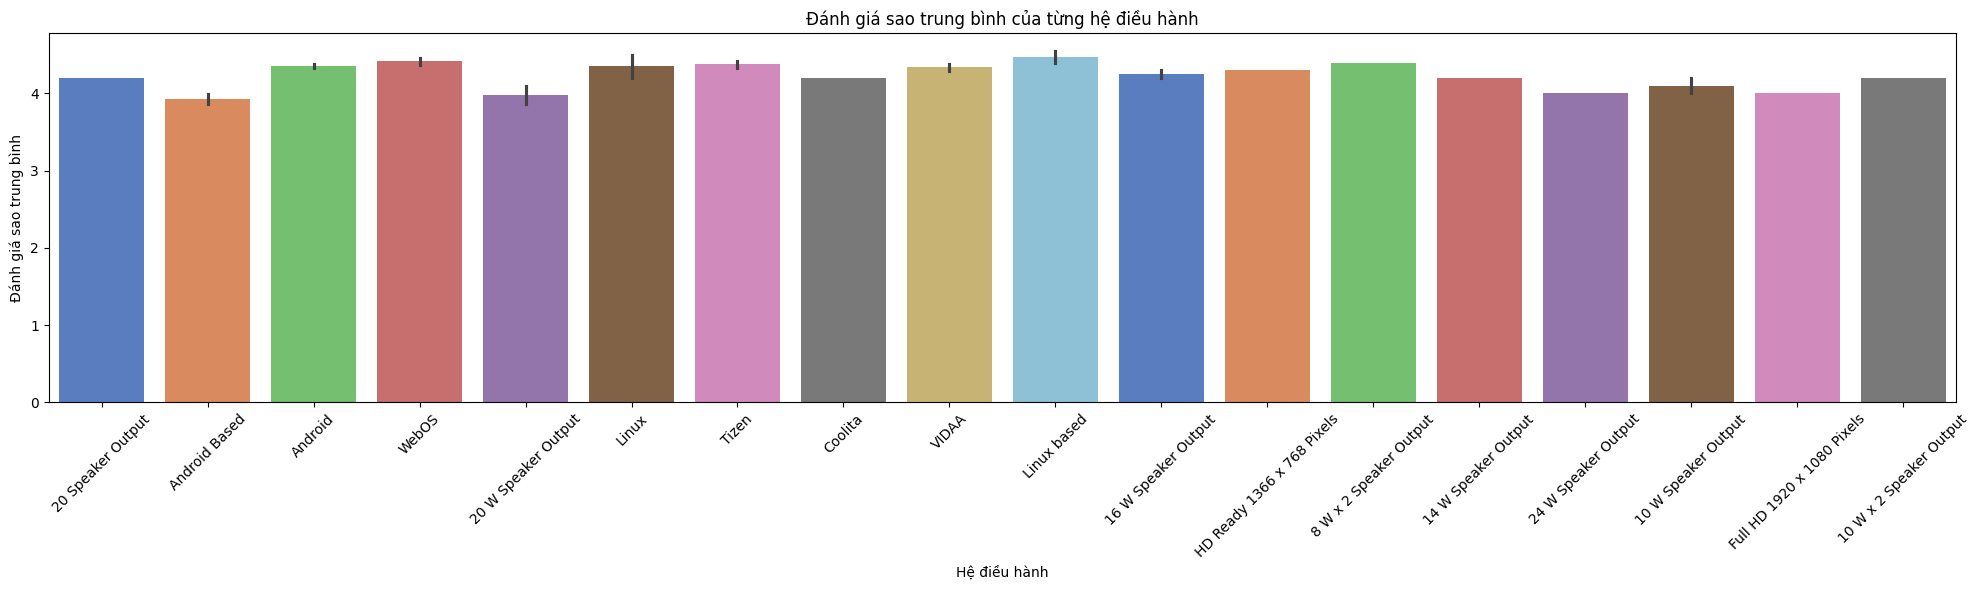

In [36]:
plt.figure(figsize=(20, 6))
df_cleaned = df[df['Stars'] != 0]
sns.barplot(x='Operating_system', y='Stars', data=df_cleaned, palette='muted')
plt.xlabel('Hệ điều hành')
plt.ylabel('Đánh giá sao trung bình')
plt.title('Đánh giá sao trung bình của từng hệ điều hành')
plt.xticks(rotation=45)  # Xoay nhãn trục x để tránh trùng lắp
plt.tight_layout()  # Đảm bảo rằng các nhãn trục không bị cắt
plt.show()

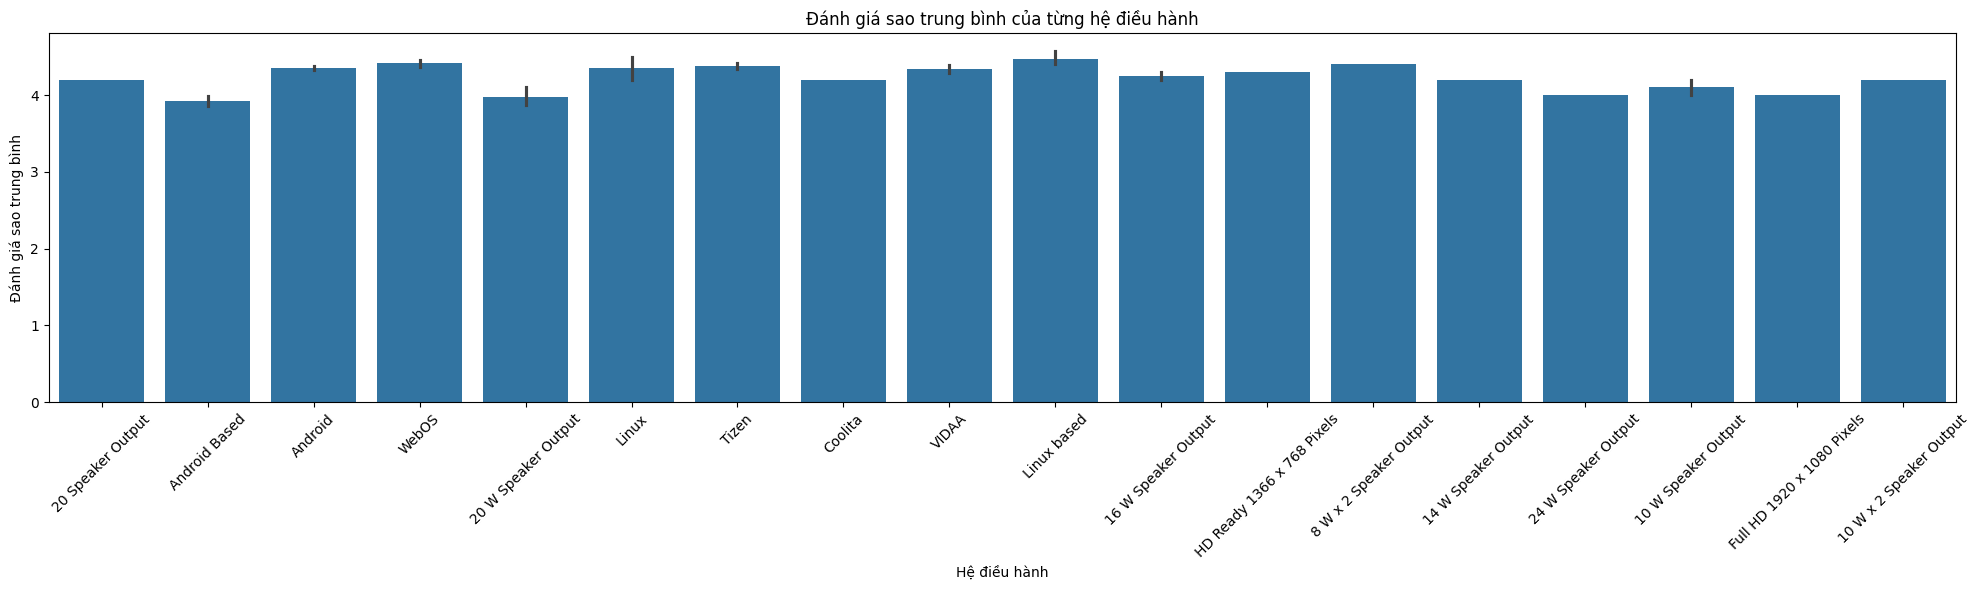

In [37]:
# Tạo biểu đồ bar chart
plt.figure(figsize=(20, 6))
df_cleaned = df[df['Stars'] != 0]
sns.barplot(x='Operating_system', y='Stars', data=df_cleaned)
plt.xlabel('Hệ điều hành')
plt.ylabel('Đánh giá sao trung bình')
plt.title('Đánh giá sao trung bình của từng hệ điều hành')
plt.xticks(rotation=45)  # Xoay nhãn trục x để tránh trùng lắp
plt.tight_layout()  # Đảm bảo rằng các nhãn trục không bị cắt
plt.show()

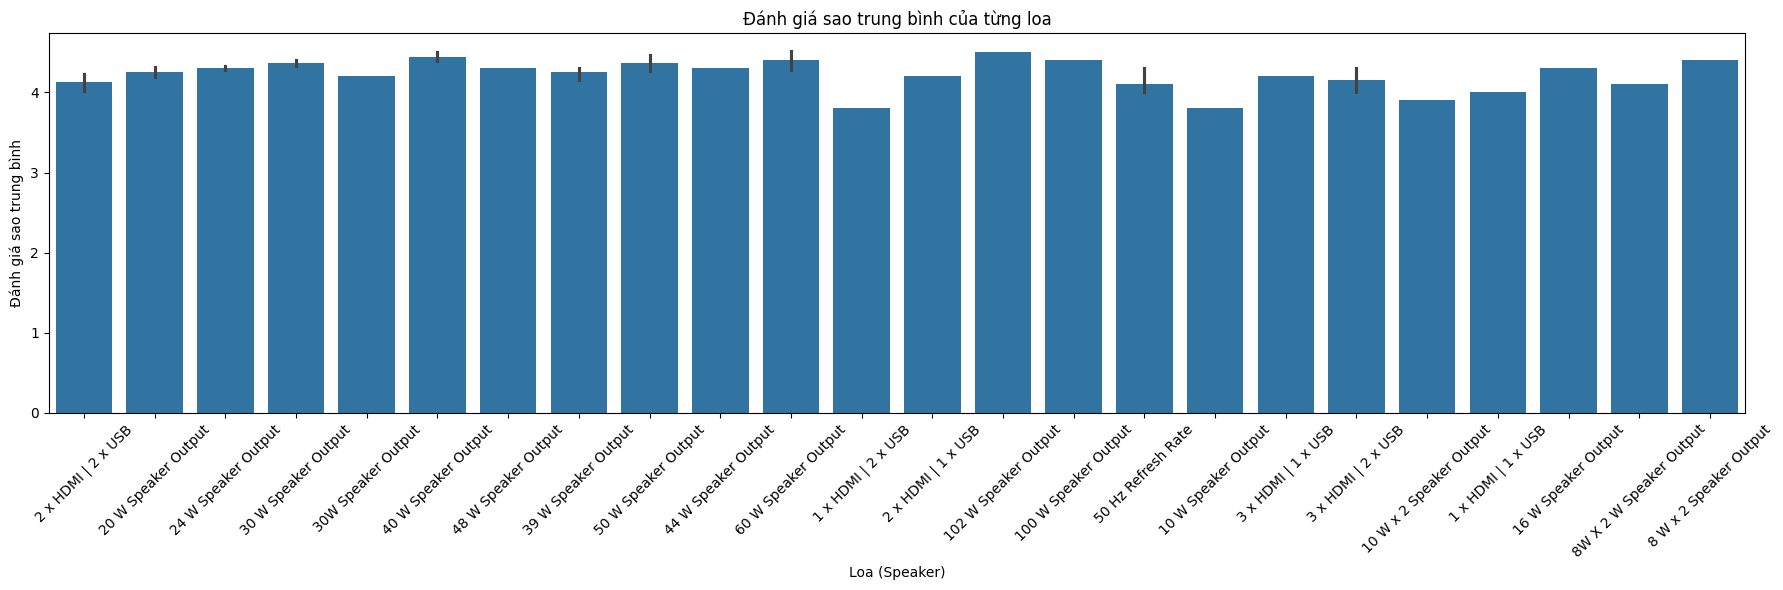

In [38]:
plt.figure(figsize=(18, 6))
# Loại bỏ các dòng trong DataFrame mà có giá trị đánh giá sao là 0
df_cleaned = df[df['Stars'] != 0]
sns.barplot(x='Speaker', y='Stars', data=df_cleaned)
plt.xlabel('Loa (Speaker)')
plt.ylabel('Đánh giá sao trung bình')
plt.title('Đánh giá sao trung bình của từng loa')
plt.xticks(rotation=45)  # Xoay nhãn trục x để tránh trùng lắp
plt.tight_layout()  # Đảm bảo rằng các nhãn trục không bị cắt
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20748\2952151144.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Name', y='current_price', data=avg_price_by_brand, palette='muted')


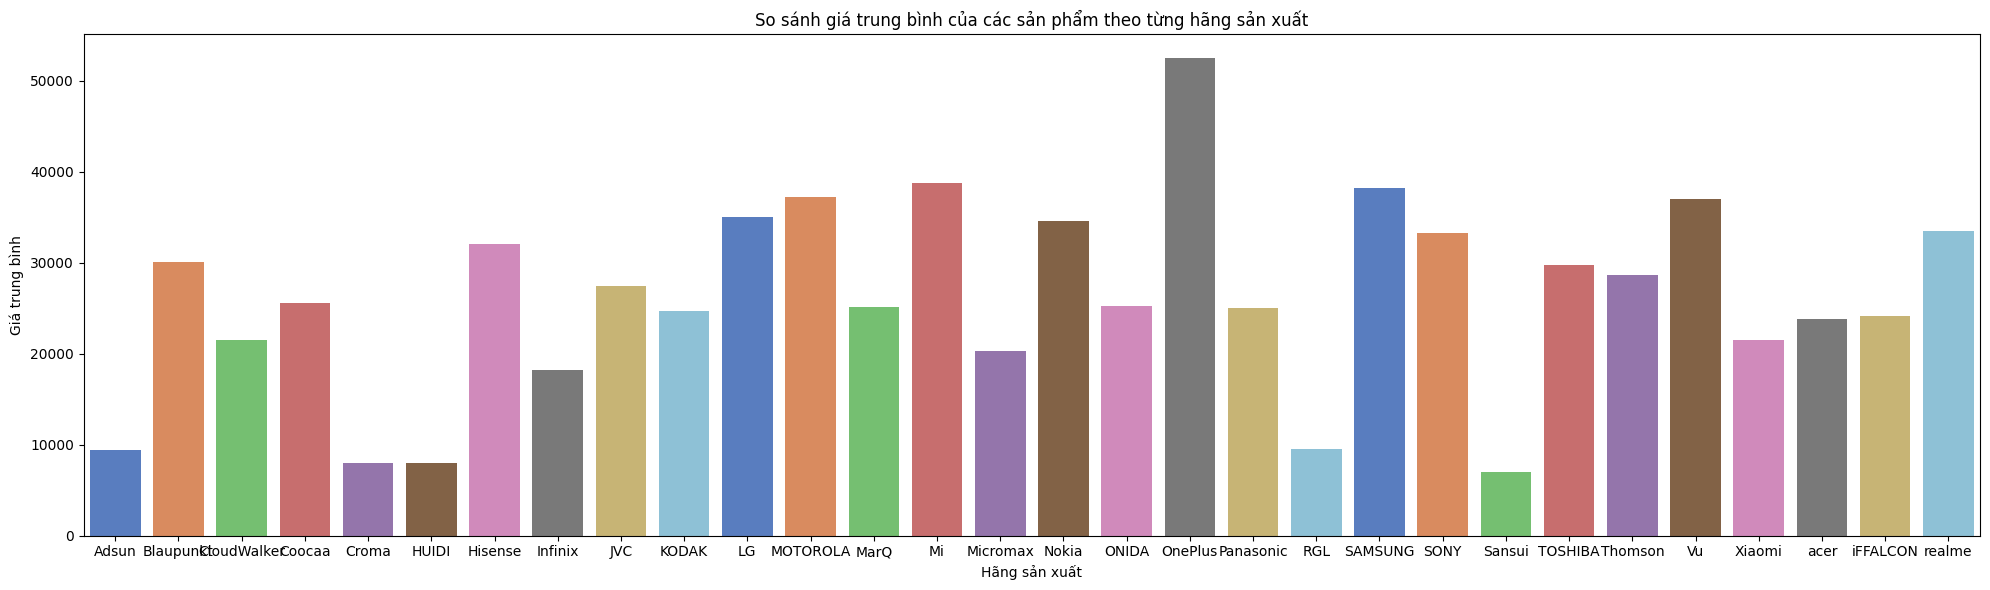

In [39]:
avg_price_by_brand = df.groupby('Product_Name')['current_price'].mean().reset_index()

# Vẽ biểu đồ bar plot với palette khác nhau cho từng cột
plt.figure(figsize=(20,6))
sns.barplot(x='Product_Name', y='current_price', data=avg_price_by_brand, palette='muted')
plt.xlabel('Hãng sản xuất')
plt.ylabel('Giá trung bình')
plt.title('So sánh giá trung bình của các sản phẩm theo từng hãng sản xuất')
plt.tight_layout()  # Đảm bảo rằng các nhãn trục không bị cắt
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20748\3374760377.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.index, y=product_counts.values, palette='muted')


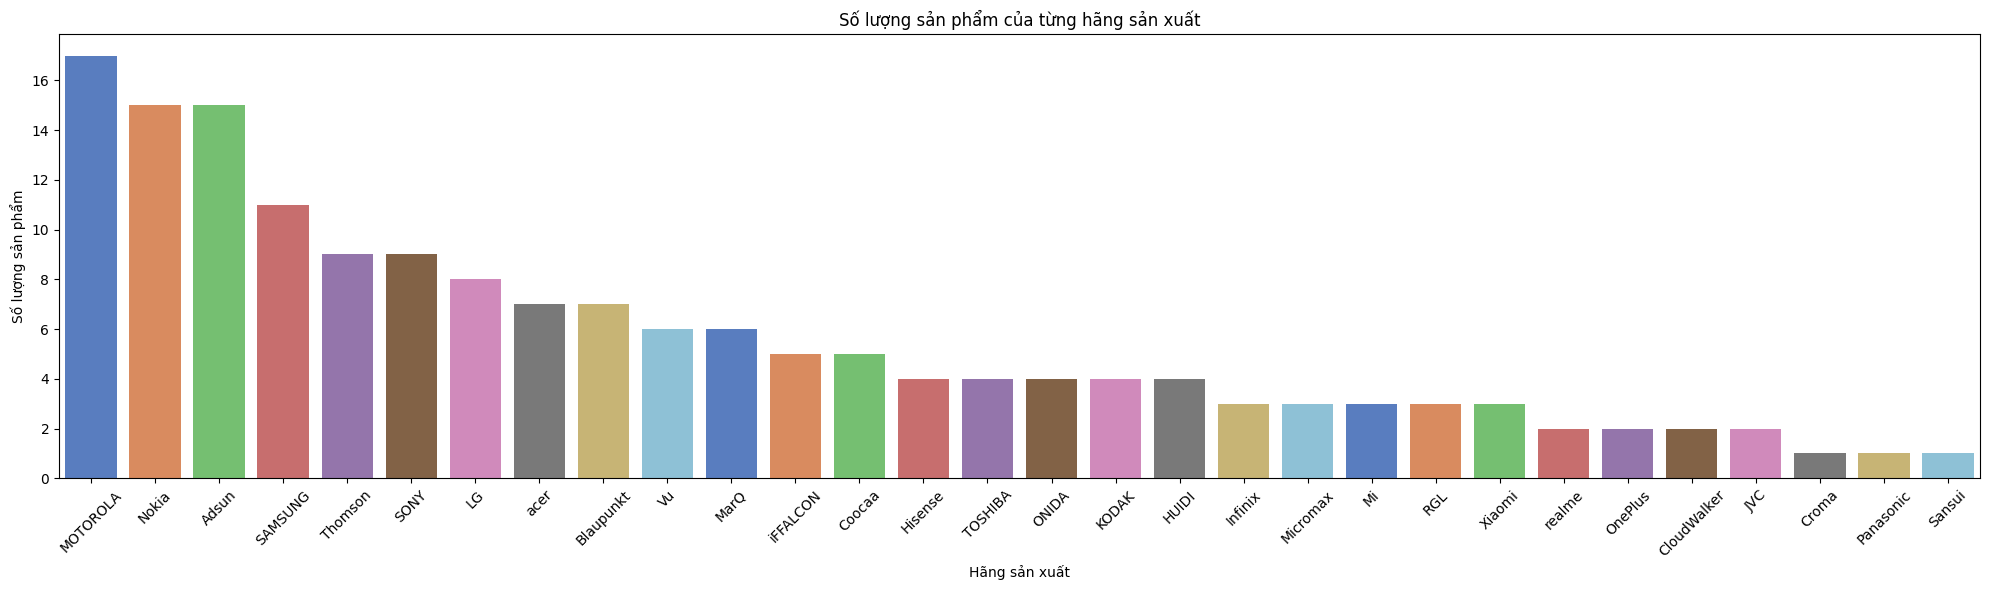

In [40]:
product_counts = df['Product_Name'].value_counts()

# Vẽ biểu đồ bar plot với palette 'pastel'
plt.figure(figsize=(20, 6))
sns.barplot(x=product_counts.index, y=product_counts.values, palette='muted')
plt.xlabel('Hãng sản xuất')
plt.ylabel('Số lượng sản phẩm')
plt.title('Số lượng sản phẩm của từng hãng sản xuất')
plt.xticks(rotation=45)  # Xoay nhãn trục x để tránh trùng lắp
plt.tight_layout()  # Đảm bảo rằng các nhãn trục không bị cắt
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20748\1428106312.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product_Name', y='current_price', data=df_filtered, palette='Set2')


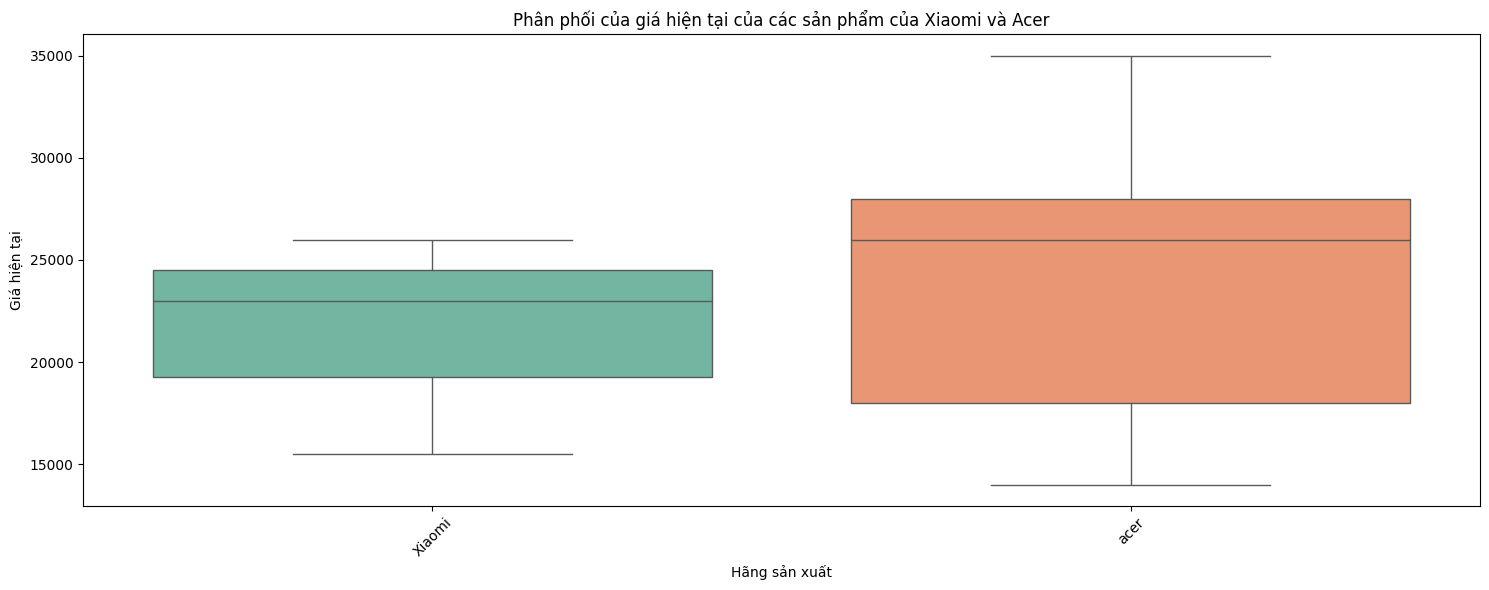

In [41]:
# Lọc dữ liệu chỉ cho hai hãng sản xuất Xiaomi và Acer
df_filtered = df[df['Product_Name'].isin(['Xiaomi', 'acer'])]

# Vẽ biểu đồ boxplot
plt.figure(figsize=(15,6))
sns.boxplot(x='Product_Name', y='current_price', data=df_filtered, palette='Set2')
plt.xlabel('Hãng sản xuất')
plt.ylabel('Giá hiện tại')
plt.title('Phân phối của giá hiện tại của các sản phẩm của Xiaomi và Acer')
plt.xticks(rotation=45)  # Xoay nhãn trục x để tránh trùng lắp
plt.tight_layout()  # Đảm bảo rằng các nhãn trục không bị cắt
plt.show()


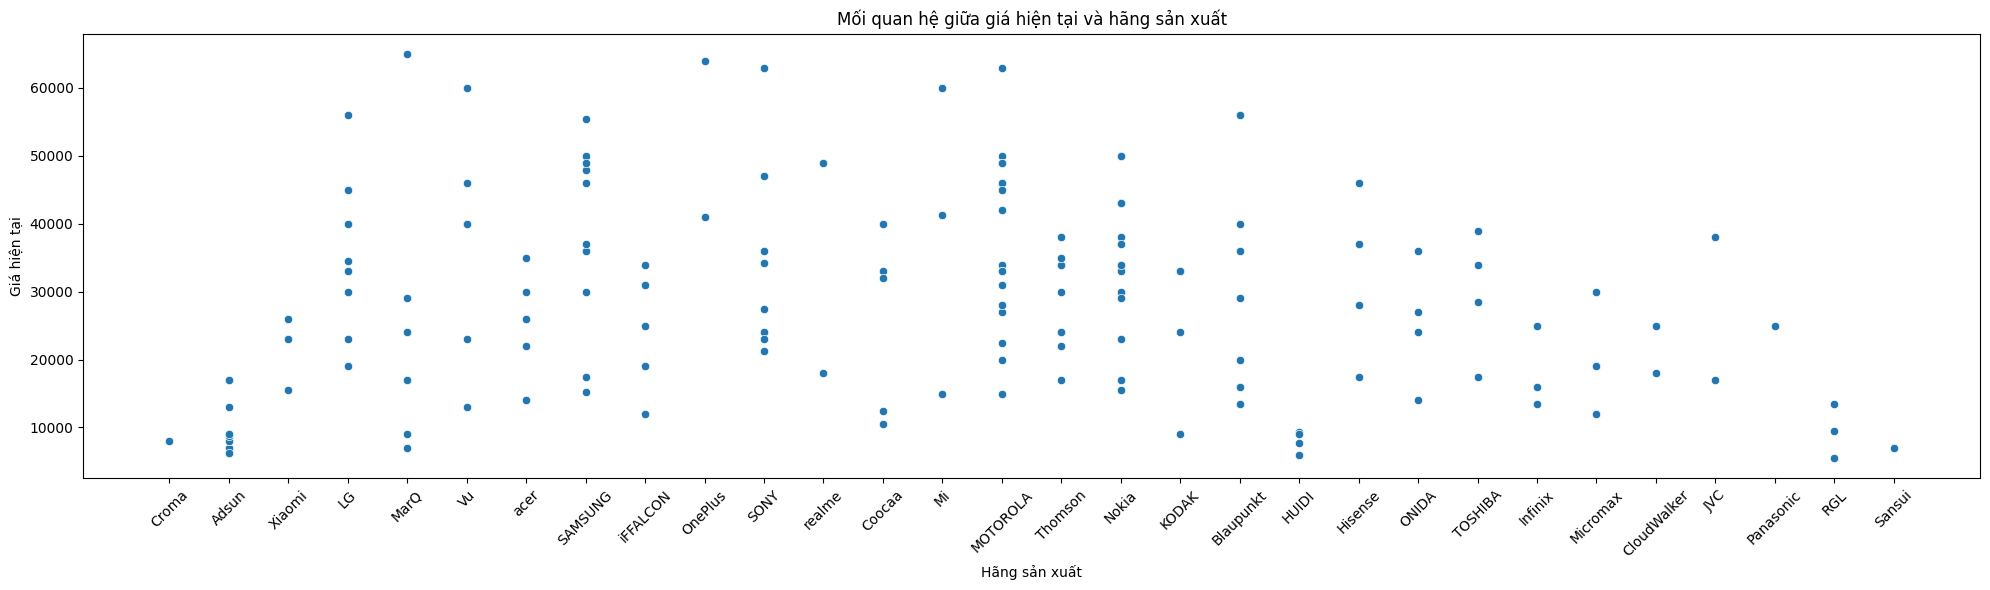

In [42]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Product_Name', y='current_price', data=df)
plt.xlabel('Hãng sản xuất')
plt.ylabel('Giá hiện tại')
plt.title('Mối quan hệ giữa giá hiện tại và hãng sản xuất')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20748\2317107888.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Name', y='Ratings', data=df, palette='muted')


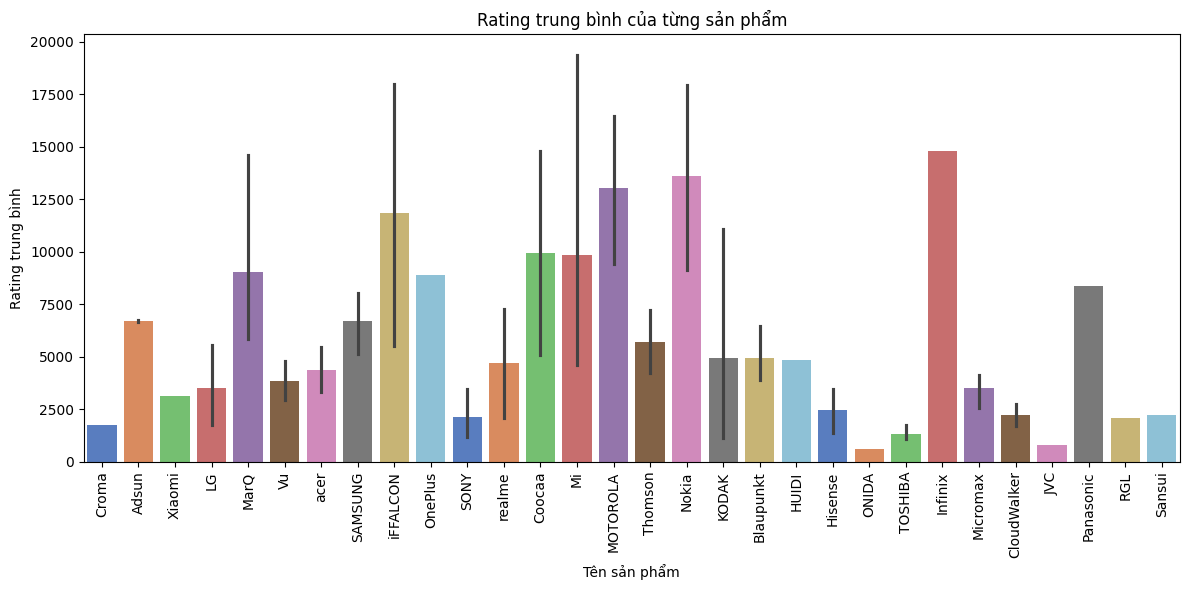

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product_Name', y='Ratings', data=df, palette='muted')
plt.xlabel('Tên sản phẩm')
plt.ylabel('Rating trung bình')
plt.title('Rating trung bình của từng sản phẩm')
plt.xticks(rotation=90)  # Xoay nhãn trục x để tránh trùng lắp
plt.tight_layout()  # Đảm bảo rằng các nhãn trục không bị cắt
plt.show()

## 2 biến phân loại (Categorical)
Biến 1: Hãng sản xuất (Product_Name).
Biến 2: Hệ điều hành (Operating_system).

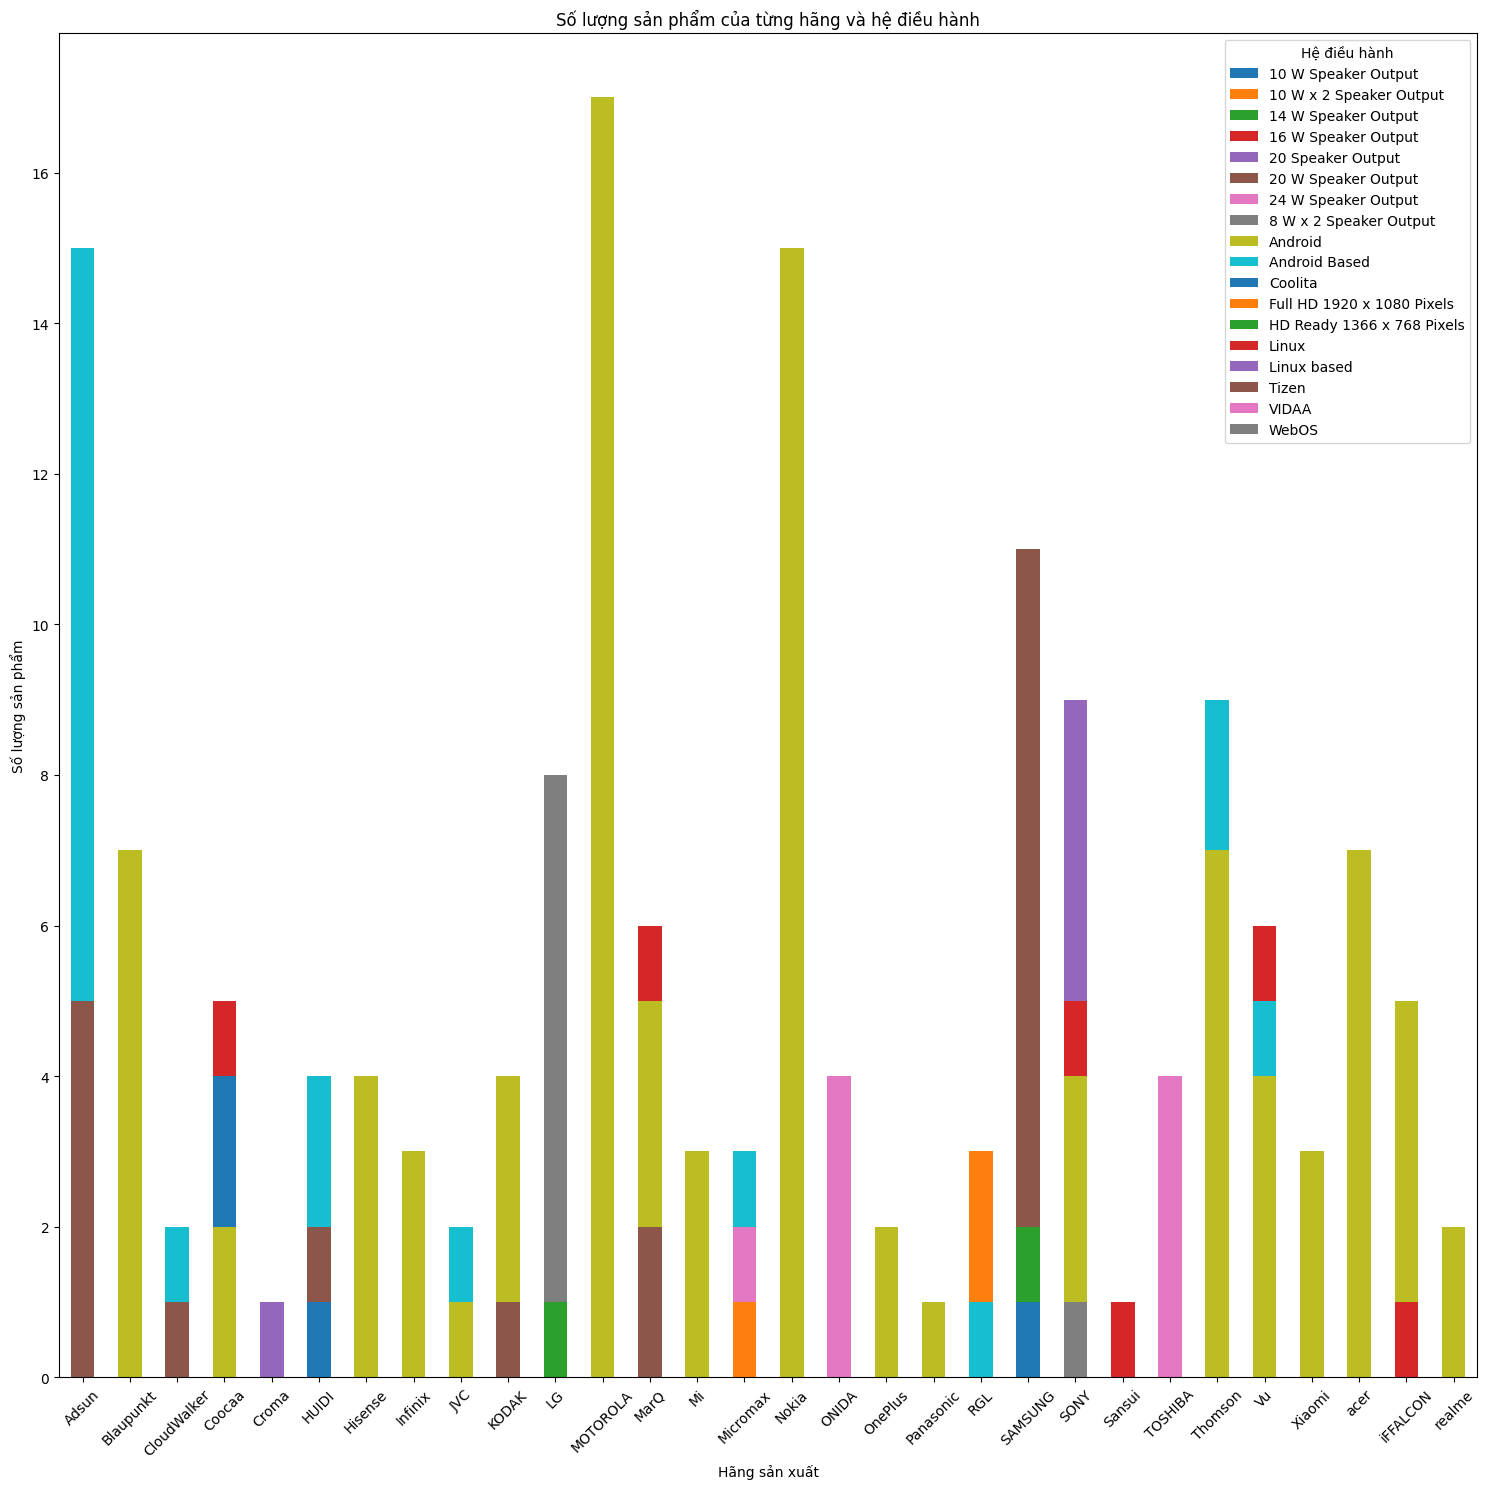

In [44]:
grouped_data = df.groupby(['Product_Name', 'Operating_system']).size().unstack(fill_value=0)

# Vẽ biểu đồ stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(15, 15))

plt.xlabel('Hãng sản xuất')
plt.ylabel('Số lượng sản phẩm')
plt.title('Số lượng sản phẩm của từng hãng và hệ điều hành')
plt.xticks(rotation=45)  # Xoay nhãn trục x để tránh trùng lắp
plt.legend(title='Hệ điều hành')
plt.tight_layout()  # Đảm bảo rằng các nhãn trục không bị cắt
plt.show()

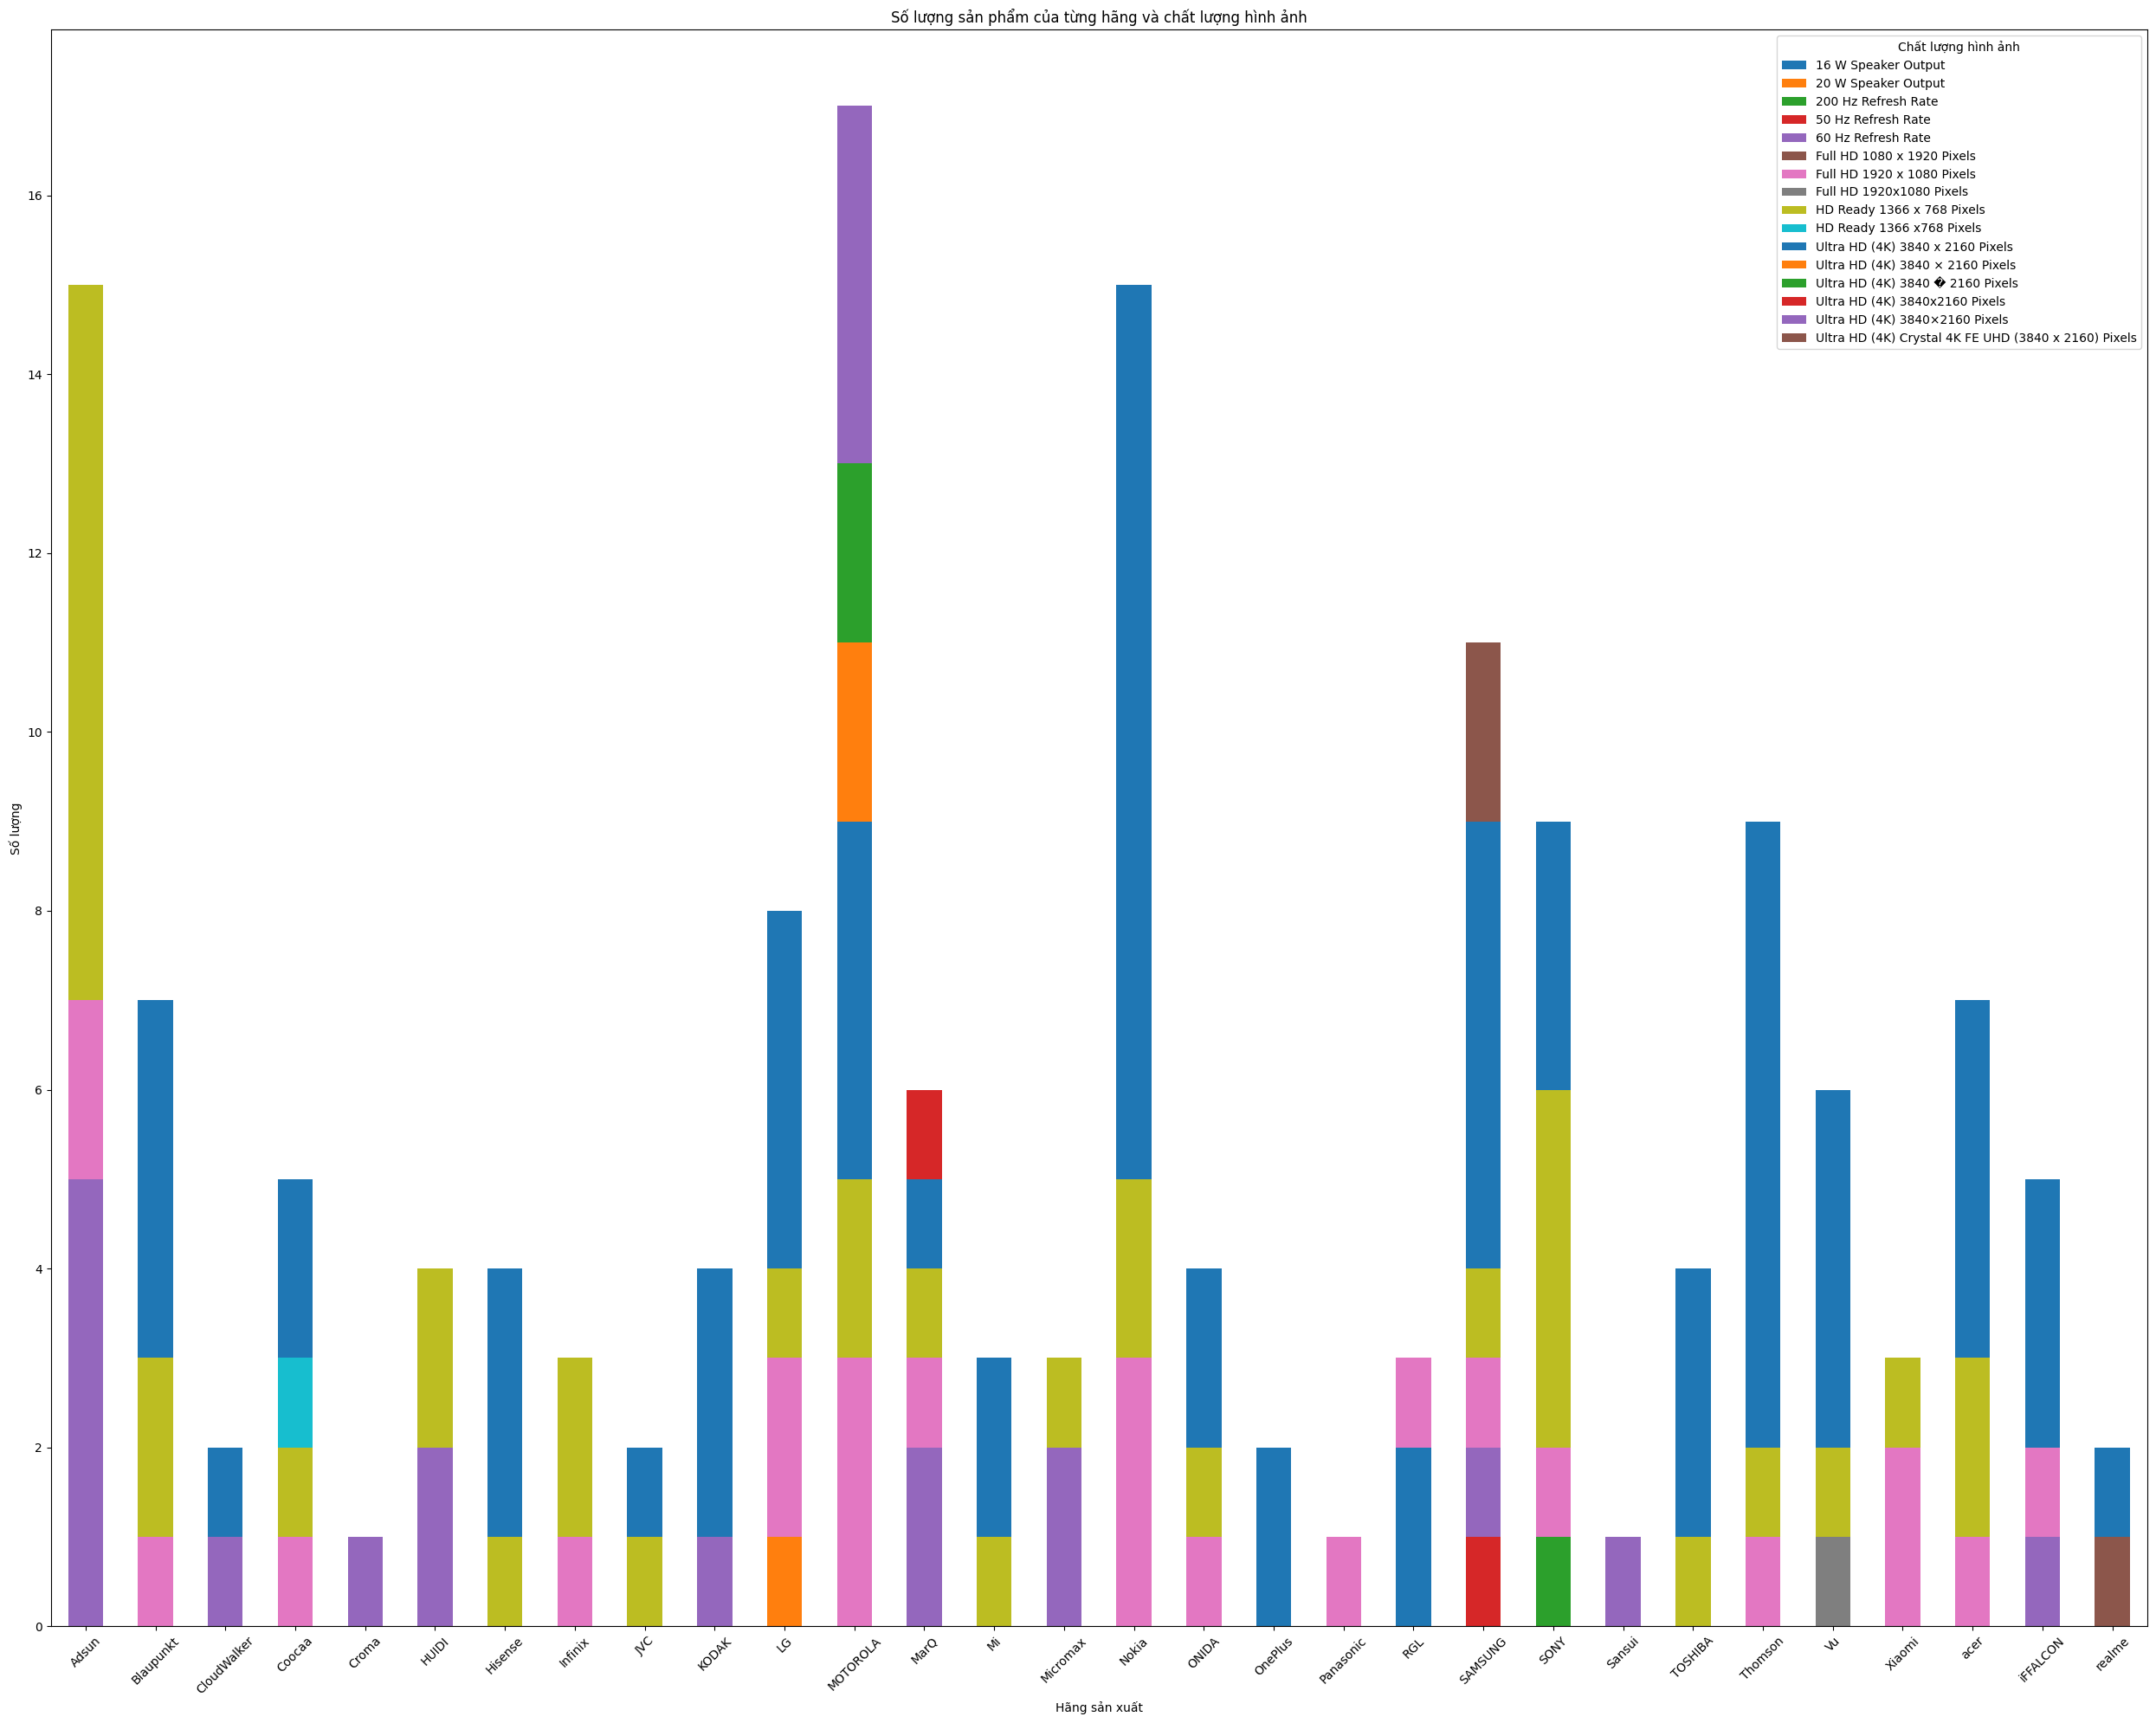

In [45]:
pivot_table = df.groupby(['Product_Name', 'Picture_qualtiy']).size().unstack(fill_value=0)

# Vẽ biểu đồ stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(25, 20))
plt.xlabel('Hãng sản xuất')
plt.ylabel('Số lượng')
plt.title('Số lượng sản phẩm của từng hãng và chất lượng hình ảnh')
plt.xticks(rotation=45)  # Xoay nhãn trục x để tránh trùng lắp
plt.legend(title='Chất lượng hình ảnh')
plt.tight_layout()  # Đảm bảo rằng các nhãn trục không bị cắt
plt.show()

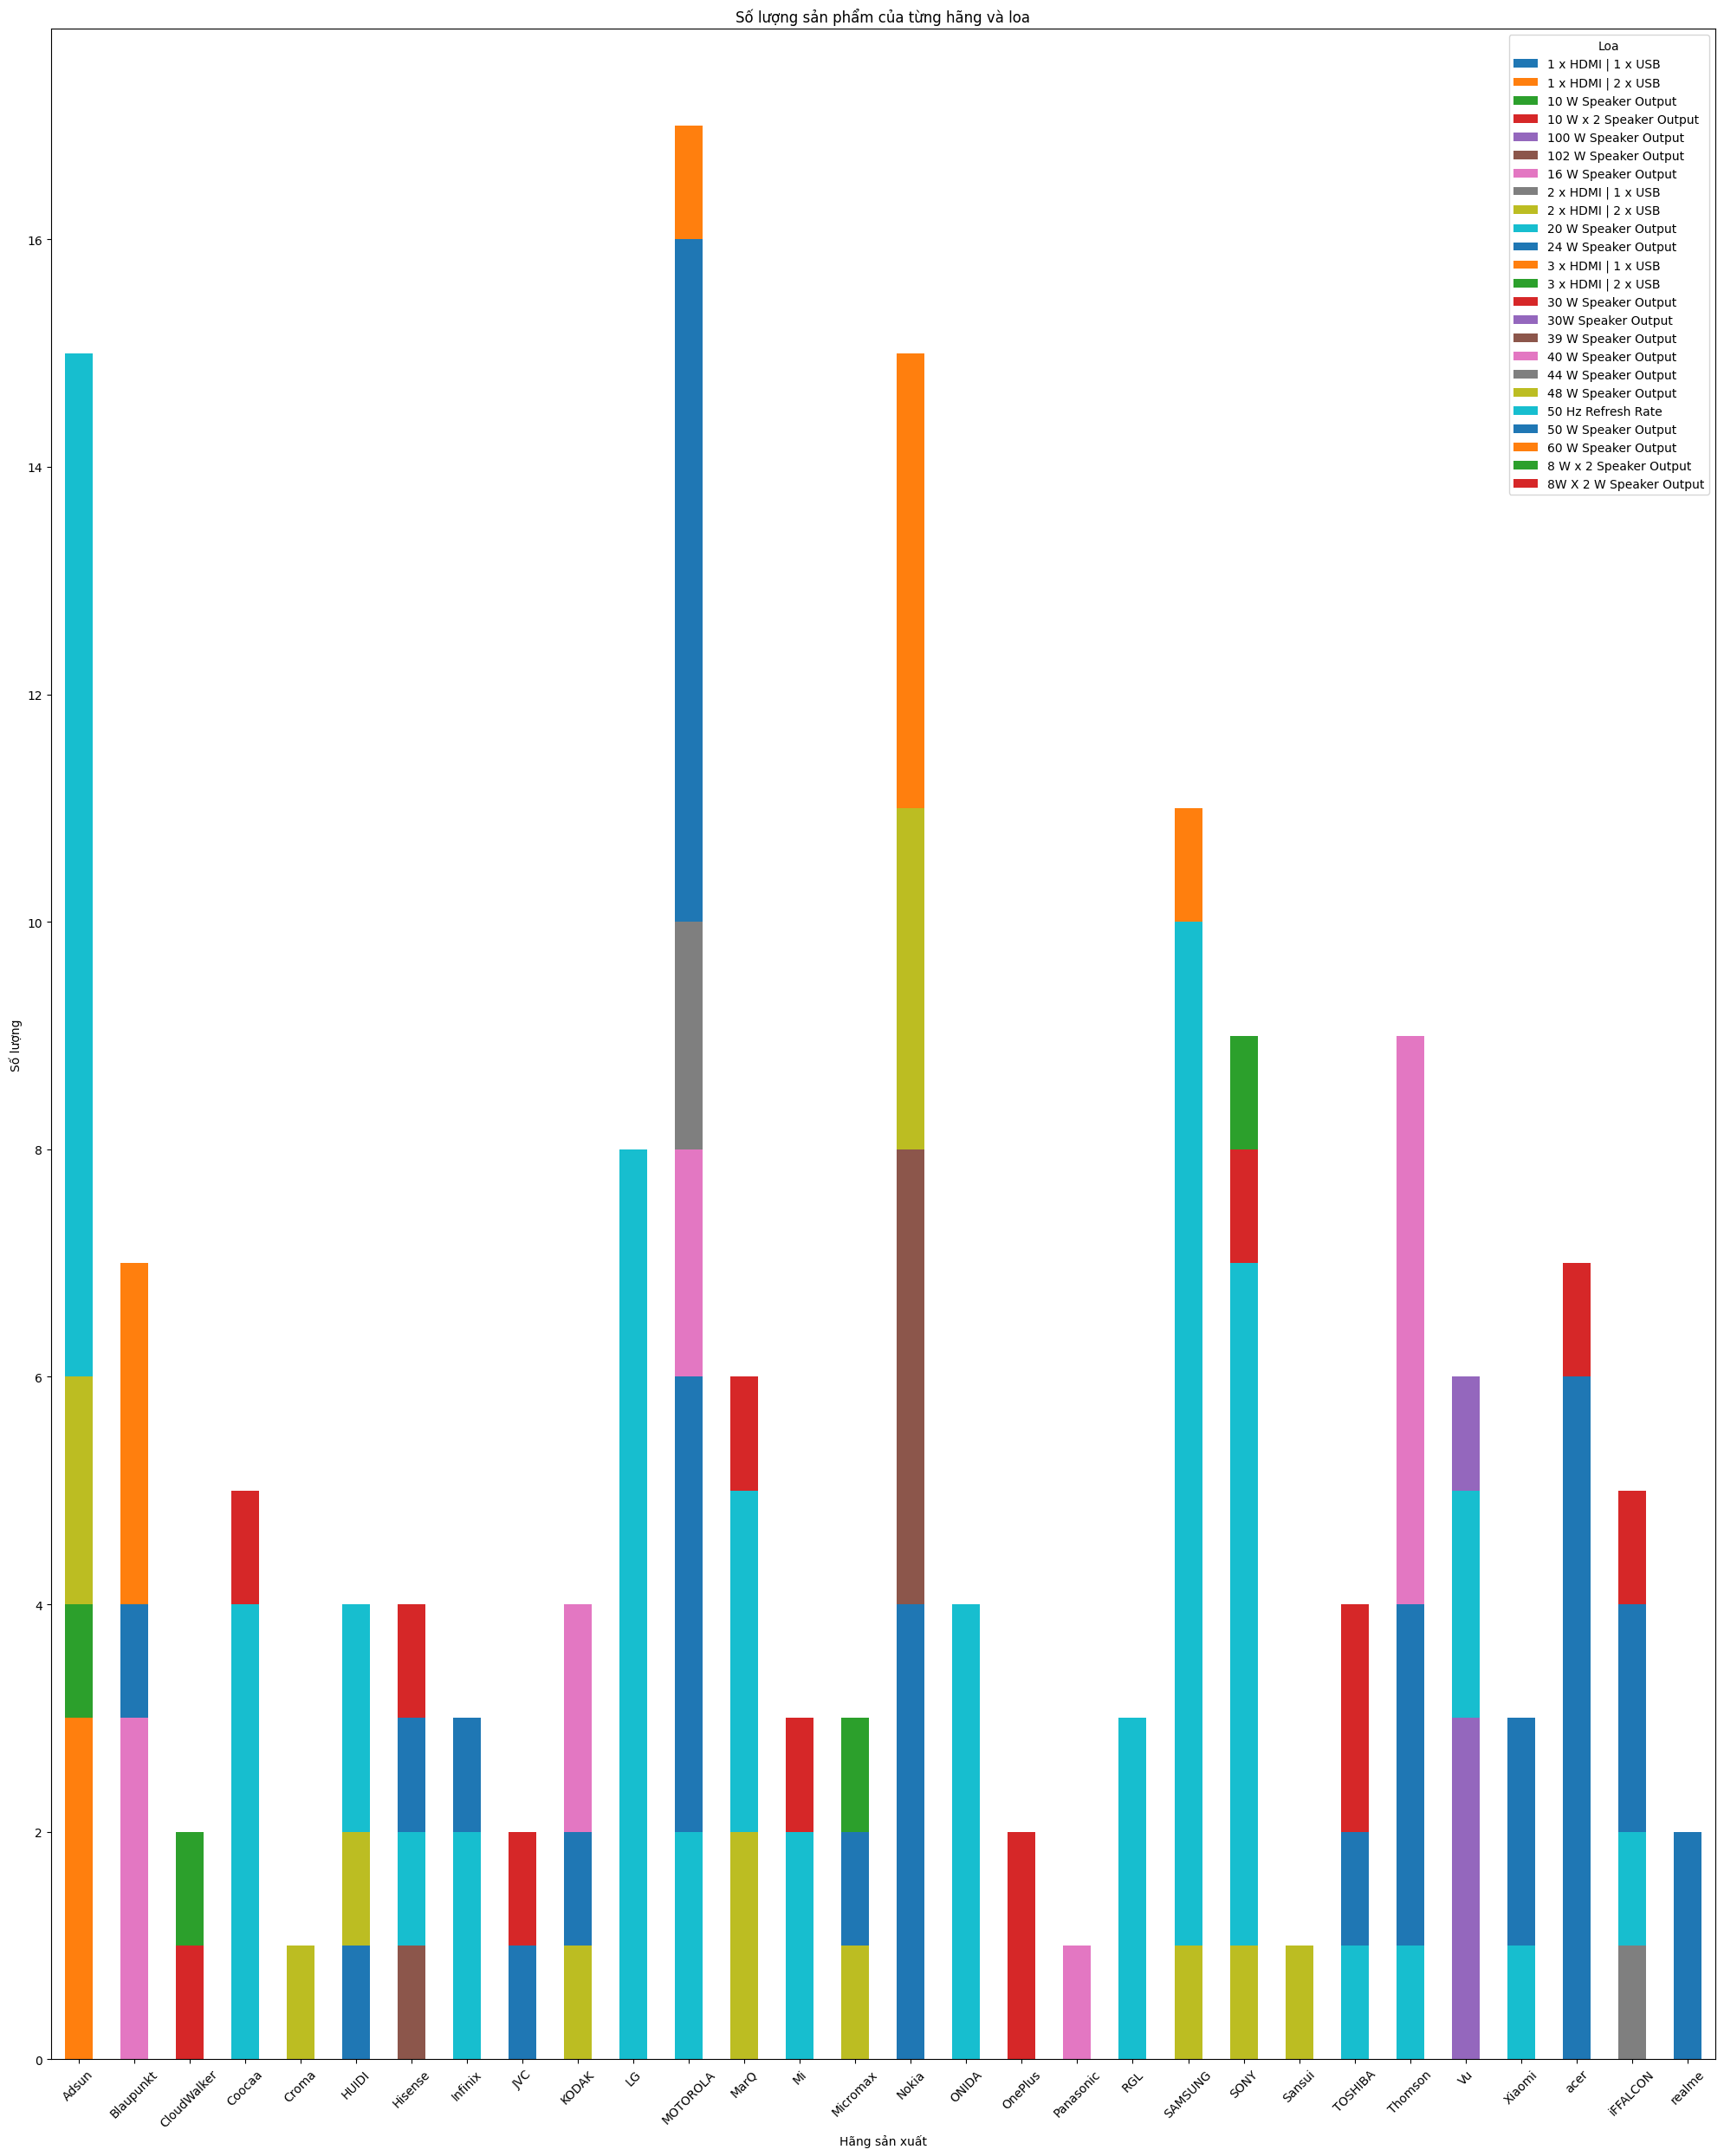

In [46]:
pivot_table = df.groupby(['Product_Name', 'Speaker']).size().unstack(fill_value=0)

# Vẽ biểu đồ stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(20, 25))
plt.xlabel('Hãng sản xuất')
plt.ylabel('Số lượng')
plt.title('Số lượng sản phẩm của từng hãng và loa')
plt.xticks(rotation=45)  # Xoay nhãn trục x để tránh trùng lắp
plt.legend(title='Loa')
plt.tight_layout()  # Đảm bảo rằng các nhãn trục không bị cắt
plt.show()

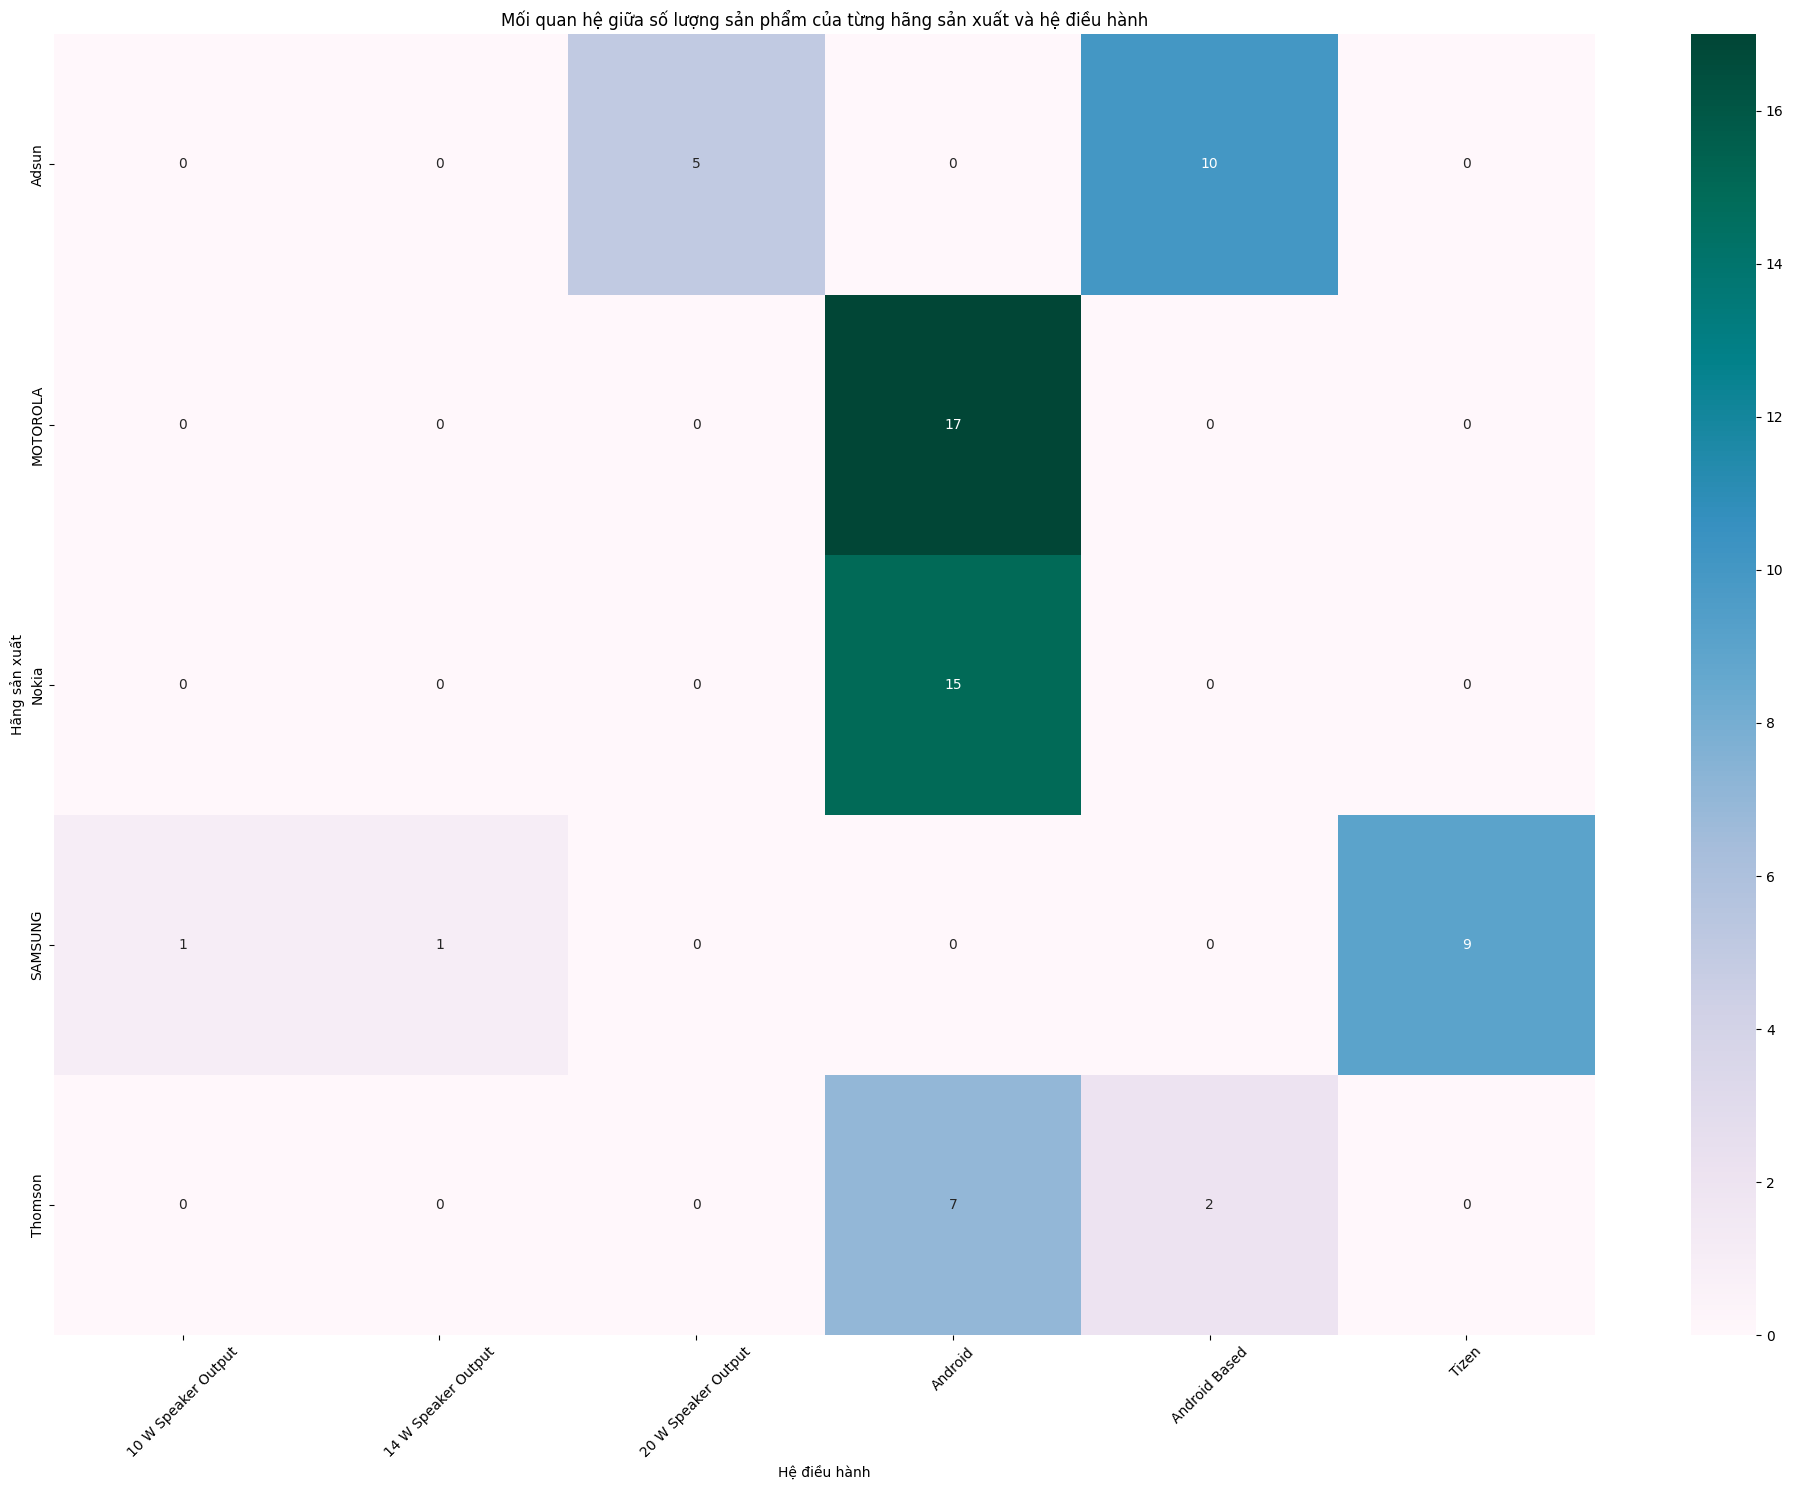

In [47]:
# Chọn chỉ 5 hãng đầu tiên từ cột 'Product_Name'
top_5_brands = df['Product_Name'].value_counts().nlargest(5).index

# Lọc DataFrame để chỉ chứa các sản phẩm của 5 hãng đầu tiên
df_top_5 = df[df['Product_Name'].isin(top_5_brands)]

# Tạo pivot table từ DataFrame đã lọc
pivot_table = df_top_5.pivot_table(index='Product_Name', columns='Operating_system', aggfunc='size', fill_value=0)

# Vẽ heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(pivot_table, cmap='PuBuGn', annot=True, fmt='g')
plt.title('Mối quan hệ giữa số lượng sản phẩm của từng hãng sản xuất và hệ điều hành')
plt.xlabel('Hệ điều hành')
plt.ylabel('Hãng sản xuất')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

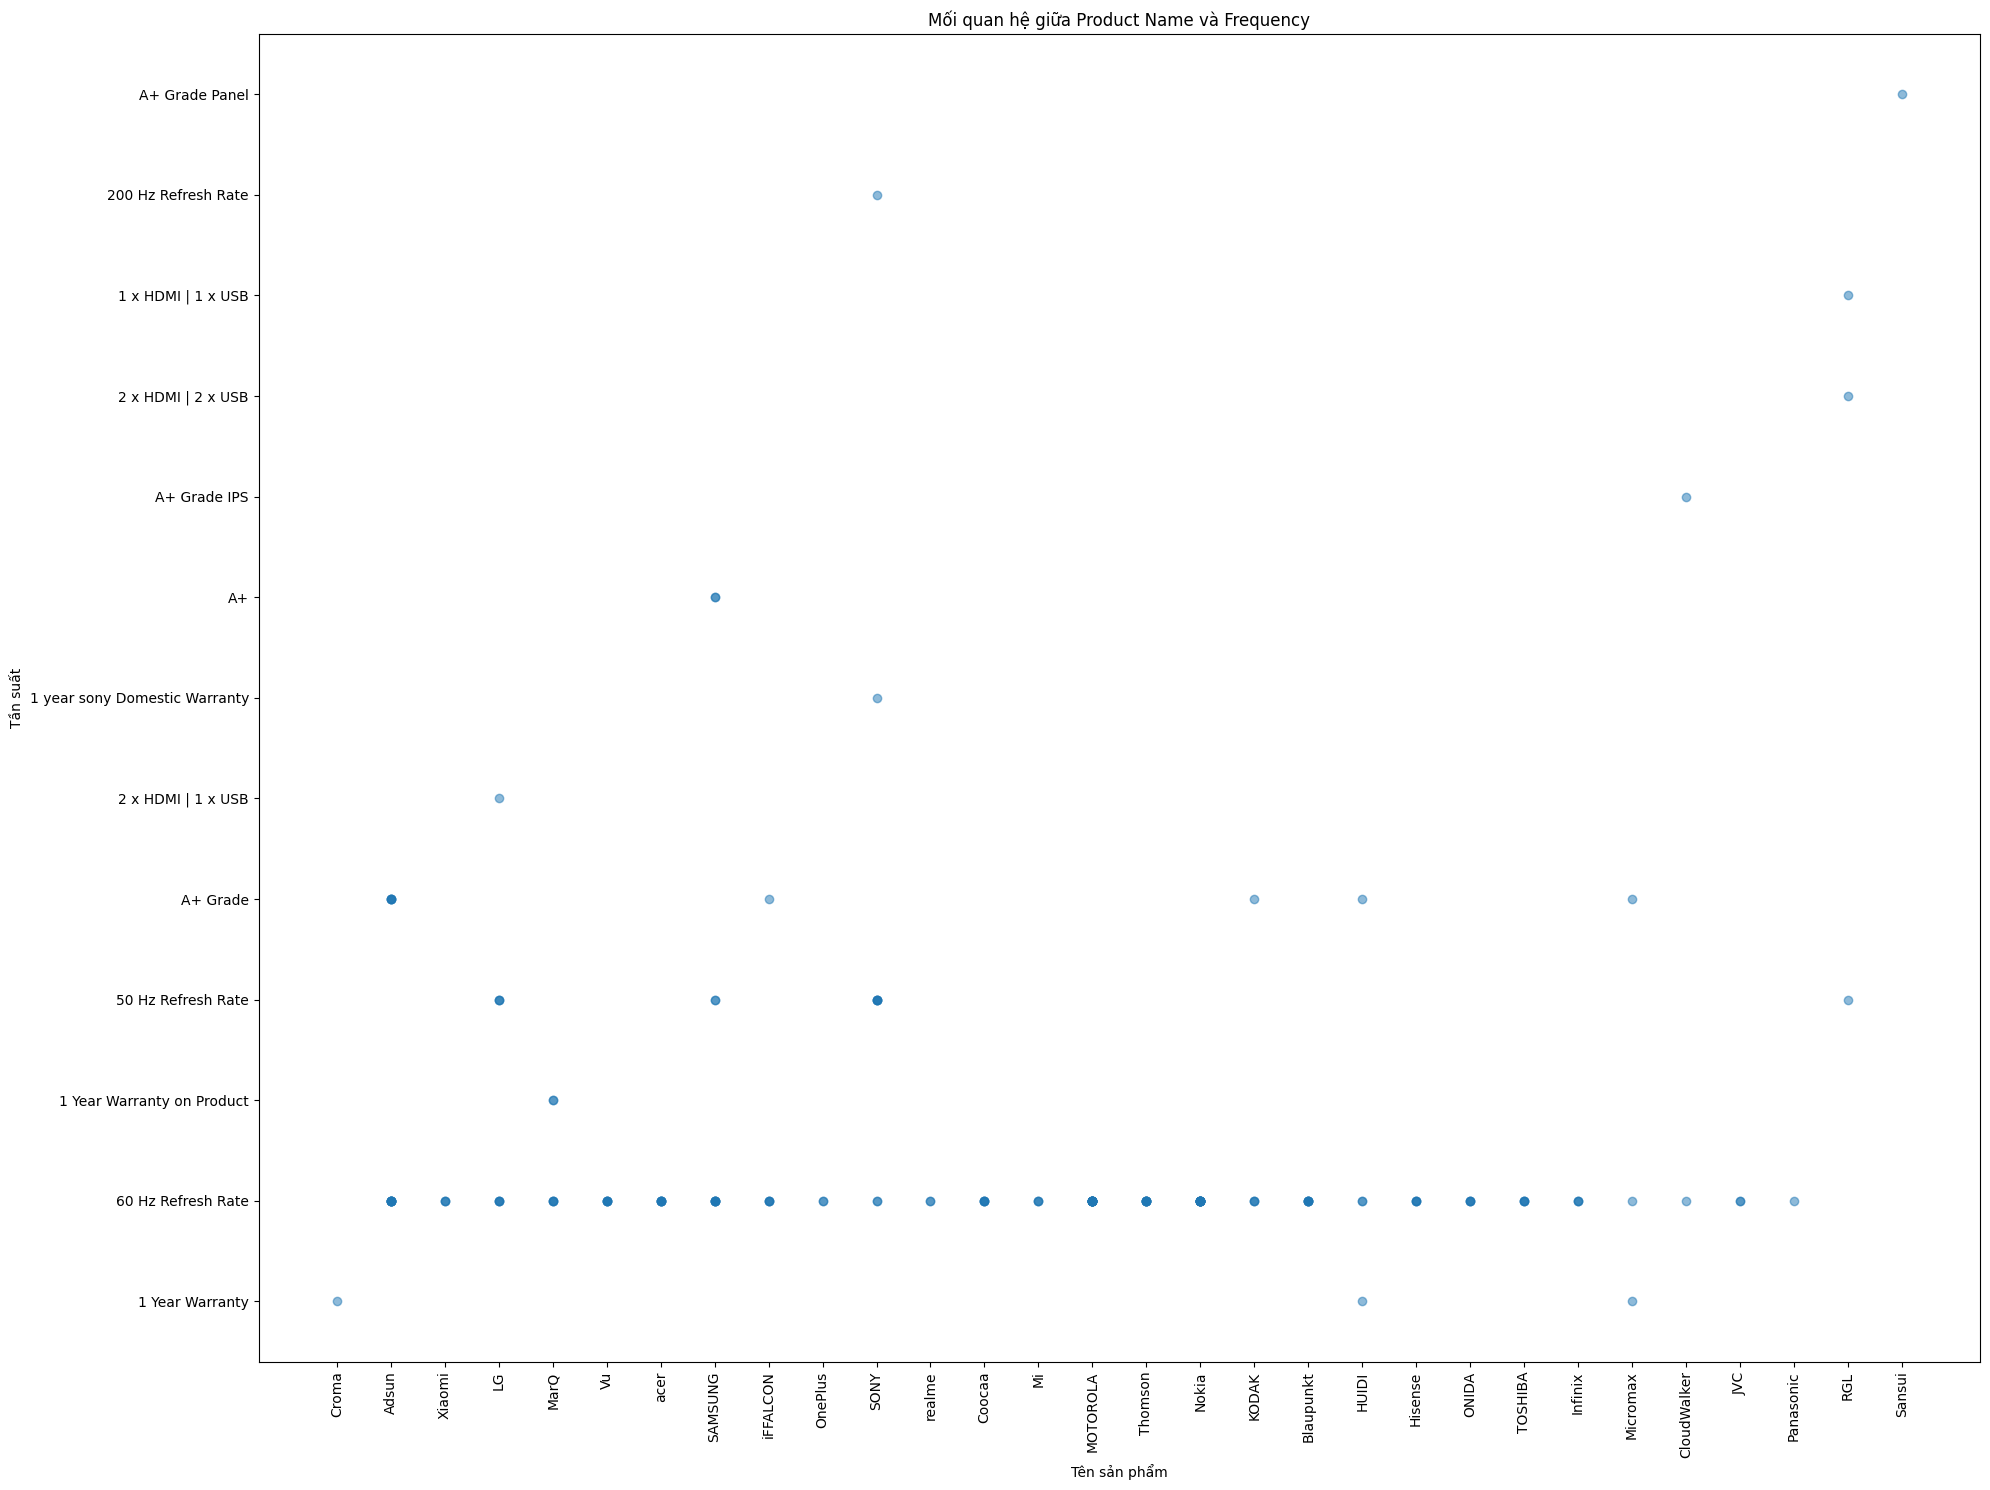

In [48]:
plt.figure(figsize=(20, 15))
plt.scatter(df['Product_Name'], df['Frequency'], alpha=0.5)
plt.xlabel('Tên sản phẩm')
plt.ylabel('Tần suất')
plt.title('Mối quan hệ giữa Product Name và Frequency')
plt.xticks(rotation=90)  # Xoay nhãn trục x để tránh trùng lắp
plt.tight_layout()  # Đảm bảo rằng các nhãn trục không bị cắt
plt.show()

## 2 biến định lượng (Quantitative)
Biến 1: Số lượng đánh giá (Reviews).
Biến 2: Giá hiện tại (current_price).

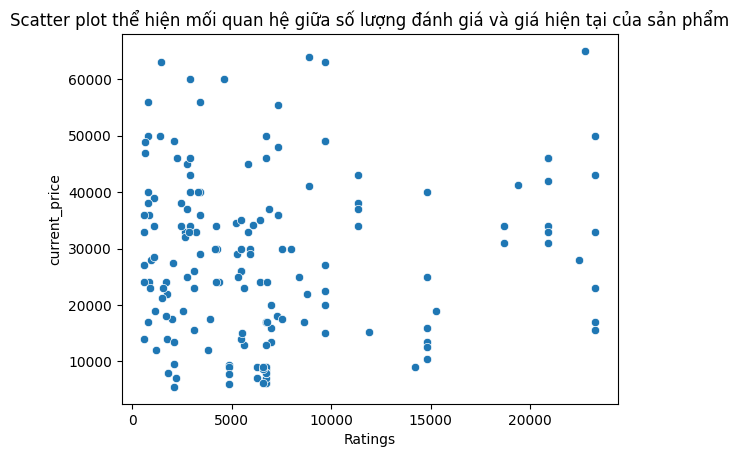

In [49]:
# Vẽ scatter plot
sns.scatterplot(x='Ratings', y='current_price', data=df)
plt.title('Scatter Plot of Ratings vs Current price')
plt.xlabel('Ratings')
plt.ylabel('current_price')
plt.title('Scatter plot thể hiện mối quan hệ giữa số lượng đánh giá và giá hiện tại của sản phẩm')
plt.show()

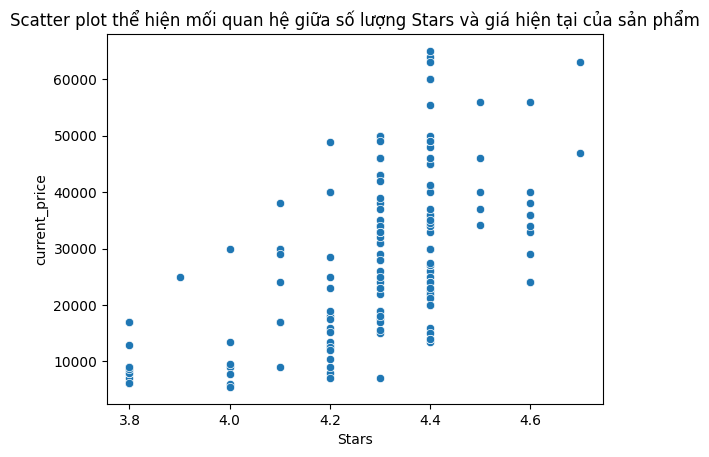

In [50]:
# Vẽ scatter plot
sns.scatterplot(x='Stars', y='current_price', data=df)
plt.title('Scatter Plot of Stars vs current_price')
plt.xlabel('Stars')
plt.ylabel('current_price')
plt.title('Scatter plot thể hiện mối quan hệ giữa số lượng Stars và giá hiện tại của sản phẩm')
plt.show()

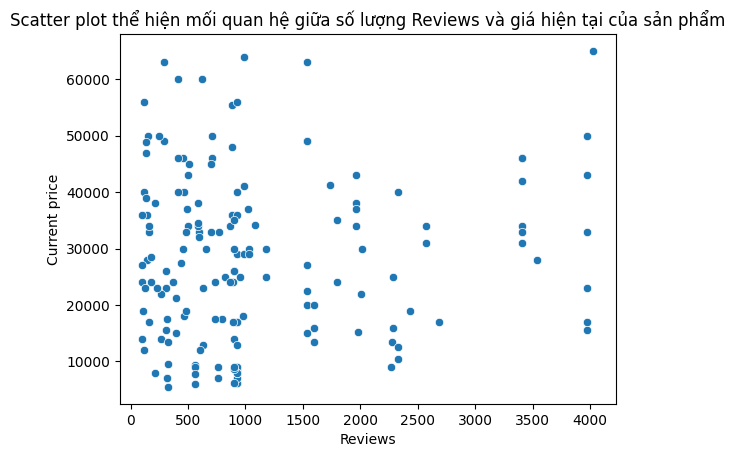

In [51]:
# Vẽ scatter plot
sns.scatterplot(x='Reviews', y='current_price', data=df)
plt.title('Scatter Plot of Reviews vs current_price')
plt.xlabel('Reviews')
plt.ylabel('Current price')
plt.title('Scatter plot thể hiện mối quan hệ giữa số lượng Reviews và giá hiện tại của sản phẩm')
plt.show()

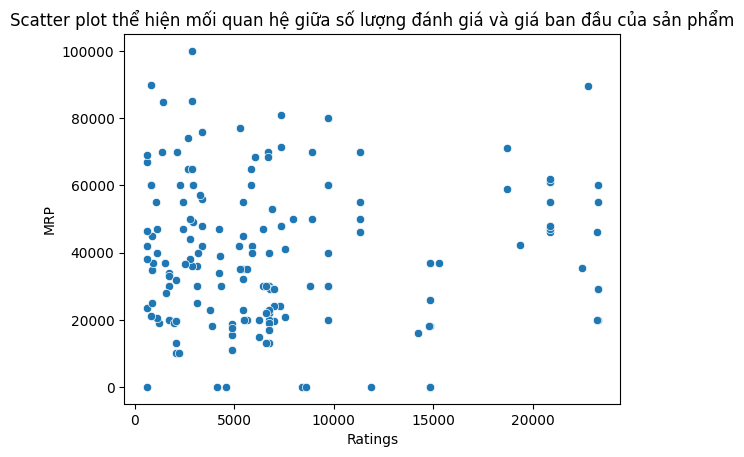

In [52]:
# Vẽ scatter plot
sns.scatterplot(x='Ratings', y='MRP', data=df)
plt.title('Scatter Plot of Ratings vs MRP')
plt.xlabel('Ratings')
plt.ylabel('MRP')
plt.title('Scatter plot thể hiện mối quan hệ giữa số lượng đánh giá và giá ban đầu của sản phẩm')
plt.show()

In [53]:
# Vẽ scatter plot
sns.scatterplot(x='Ratings', y='Stars', data=df)
plt.title('Scatter Plot of Ratings vs Stars')
plt.xlabel('Ratings')
plt.ylabel('Stars')
plt.title('Scatter plot thể hiện mối quan hệ giữa số lượng đánh giá và stars của sản phẩm')
plt.show()

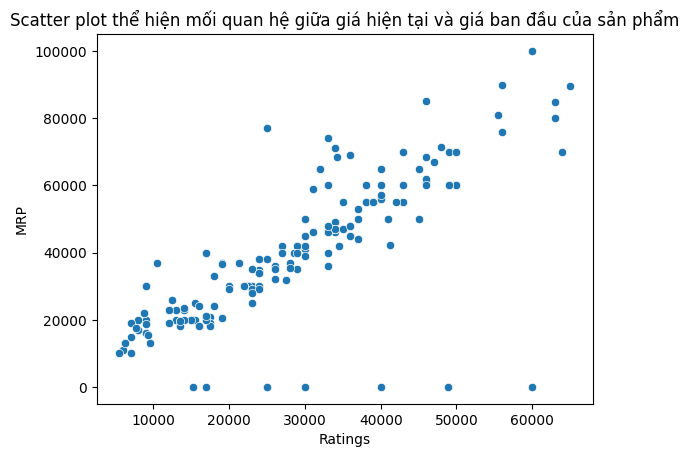

In [54]:
# Vẽ scatter plot
sns.scatterplot(x='current_price', y='MRP', data=df)
plt.title('Scatter Plot of Curent price vs MRP')
plt.xlabel('Ratings')
plt.ylabel('MRP')
plt.title('Scatter plot thể hiện mối quan hệ giữa giá hiện tại và giá ban đầu của sản phẩm')
plt.show()

## Mô hình hồi quy đơn biến

Phương trình đường thẳng: y = 0.16421621087960325 * x + 26971.73311357379
Hệ số hồi quy (slope): 0.16421621087960325
Hệ số điều chỉnh (intercept): 26971.73311357379


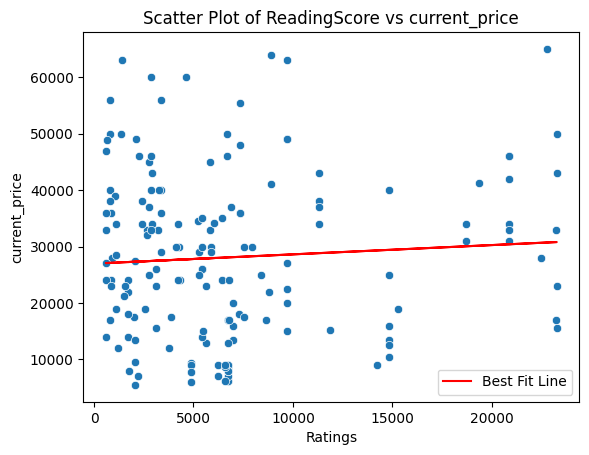

In [55]:
#Kiểm tra sự tương qua giữa 2 biến Ratings và current_price bằng biểu đồ

# Vẽ scatter plot
sns.scatterplot(x='Ratings', y='current_price', data=df)
plt.title('Scatter Plot of ReadingScore vs current_price')
plt.xlabel('Ratings')
plt.ylabel('current_price')

# Vẽ linear regression dùng polyfit
coefficients = np.polyfit(df['Ratings'], df['current_price'], 1)
slope = coefficients[0]
intercept = coefficients[1]
print("Phương trình đường thẳng: y =", slope, "* x +", intercept)


# Tính toán các điểm trên đường thẳng
x_values = df['Ratings']
y_values = slope * x_values + intercept

# Vẽ đường thẳng
plt.plot(x_values, y_values, color='red', label='Best Fit Line')

# In ra hệ số và hệ số điều chỉnh
print("Hệ số hồi quy (slope):", slope)
print("Hệ số điều chỉnh (intercept):", intercept)

plt.legend()
plt.show()

## Mô hình hồi quy đa biến

In [56]:
X = df[['Stars', 'Ratings', 'Reviews']]
y = df['current_price']
regr = linear_model.LinearRegression()
regr.fit(X, y)
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [ 4.29801218e+04  5.48566870e-01 -1.70279736e+00]
Intercept: -157449.33531815218


In [57]:
rating_score = df['Ratings']
num_reviews = df['Reviews']
price = df['current_price']

# Tạo mô hình hồi quy tuyến tính
X = df[['Ratings', 'Reviews']]
y = df['current_price']
model = LinearRegression().fit(X, y)

# Biểu đồ 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Vẽ biểu đồ
ax.scatter(rating_score, num_reviews, price, c='r', marker='o')

# Dự đoán giá trị để vẽ đường hồi quy
rating_score_pred = np.linspace(min(rating_score), max(rating_score), 100)
num_reviews_pred = np.linspace(min(num_reviews), max(num_reviews), 100)
rating_score_pred, num_reviews_pred = np.meshgrid(rating_score_pred, num_reviews_pred)
price_pred = model.predict(pd.DataFrame({'Ratings': rating_score_pred.flatten(), 'Reviews': num_reviews_pred.flatten()})).reshape(rating_score_pred.shape)

# Vẽ đường hồi quy trên biểu đồ
ax.plot_surface(rating_score_pred, num_reviews_pred, price_pred, alpha=0.5, color='green')

plt.title('Biểu đồ 3D mô hình hồi quy tuyến tính theo 3 biến')
ax.set_xlabel('Ratings')
ax.set_ylabel('Reviews')
ax.set_zlabel('current_price')
plt.xticks(rotation=90)

plt.show()